In [1]:
%load_ext autoreload
%autoreload 2


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
%cd /content/gdrive/My Drive/Tolman-Eichenbaum-Machine



/content/gdrive/My Drive/Tolman-Eichenbaum-Machine


In [5]:
! ls



 clustering_final.ipynb
 Clustering.ipynb
'Copy of TEM_notebook_social_hierarchy (1).ipynb'
'Copy of TEM_notebook_social_hierarchy.ipynb'
'Copy of TEM_notebook_square.ipynb'
 g0_auto.pdf
 generalising-structural-knowledge
 Main_TEM_notebook_social_hierarchy.ipynb
 plot_TEM_results
 Summaries
 TEM_notebook_familytree.ipynb
 TEM_notebook_HEX.ipynb
 TEM_notebook_line_ti.ipynb
 TEM_notebook_loop_laps.ipynb
 TEM_notebook_social_hierarchy.ipynb
 TEM_run.ipynb
 torch_tem


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import datetime
import re
from os import listdir
import sys
#sys.path.insert(0, 'model_files/')
sys.path.insert(0, 'generalising-structural-knowledge/')
from plotting_functions import *
from arb_functions import *
from helper_functions import *
from behaviour_analyses import *
from environment_functions import *

save_dirs = ['Summaries/']

date = '2021-01-04'
run = '0_social_hierarchy_small_world_n_action=3' 

recent = -1
data, para, list_of_files, save_path = get_data(save_dirs, run, date, recent)

A_RNN, g2g, x_all, g_all, p_all, p_gen_all, acc_s_t_to, acc_s_t_from, positions, shinys, adj, timeseries = data
params, widths, batch_id, g_size, p_size, s_size, s_size_comp, n_freq, width, states = para

mult = 4 if params['world_type'] == 'tonegawa' else 4  # upsample
smoothing = 1
cmap = 'jet'
maxmin=True

import seaborn
seaborn.set_style(style='white')
seaborn.set_style({'axes.spines.bottom': False,'axes.spines.left': False,'axes.spines.right': \
                   False,'axes.spines.top': False})

shinys_, masks, g_lim, p_lim = sort_data(g_all=g_all, p_all=p_all, shinys=shinys, widths=widths, mult=1, smoothing=0, params=params, batch_id=batch_id, \
                                         g_max_0=False, p_max_0=True)

yesSummaries/2021-01-04/run0_social_hierarchy_small_world_n_action=3/save
2003 1
50075
no p_timeseries


In [8]:
env0 = 1
env1 = 2

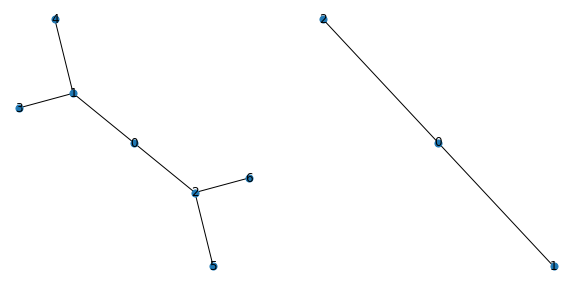

In [9]:

import networkx as nx
try:
    plt.figure(figsize=(10,5))
    for i, env in enumerate([env0, env1]):
        adj_ = remove_zero_adj(adj[env])
        plt.subplot(1,2,i + 1)
        g = nx.from_numpy_matrix(adj_)
        pos_nodes = nx.spring_layout(g, iterations=500)
        nx.draw(g, pos=pos_nodes, node_size=50, with_labels=True)
    
    plt.show()
except TypeError:
    plt.close('all')
    pass

In [11]:
for env in range(params['n_envs_save']):
    num_correct = np.sum(acc_s_t_to[env] * positions[env])
    proportion = num_correct / sum(positions[env])
    approx_num = proportion * np.sum(positions[env] > 0.1)
    print(env, '   Approx proportion : ', np.round(proportion, decimals=3), \
          '   Approx num : ', np.round(approx_num, decimals=2))

0    Approx proportion :  0.966    Approx num :  6.76
1    Approx proportion :  0.96    Approx num :  6.72
2    Approx proportion :  0.983    Approx num :  2.95
3    Approx proportion :  0.983    Approx num :  2.95
4    Approx proportion :  0.96    Approx num :  6.72
5    Approx proportion :  0.96    Approx num :  6.72


In [13]:
params['widths']

[2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1]

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

import networkx as nx
import random

    
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)





In [21]:
g_all[env0][:,100]

array([ 0.00138426, -0.00172451,  0.00097555, -0.01045499, -0.00121058,
       -0.01028624,  0.00215156])

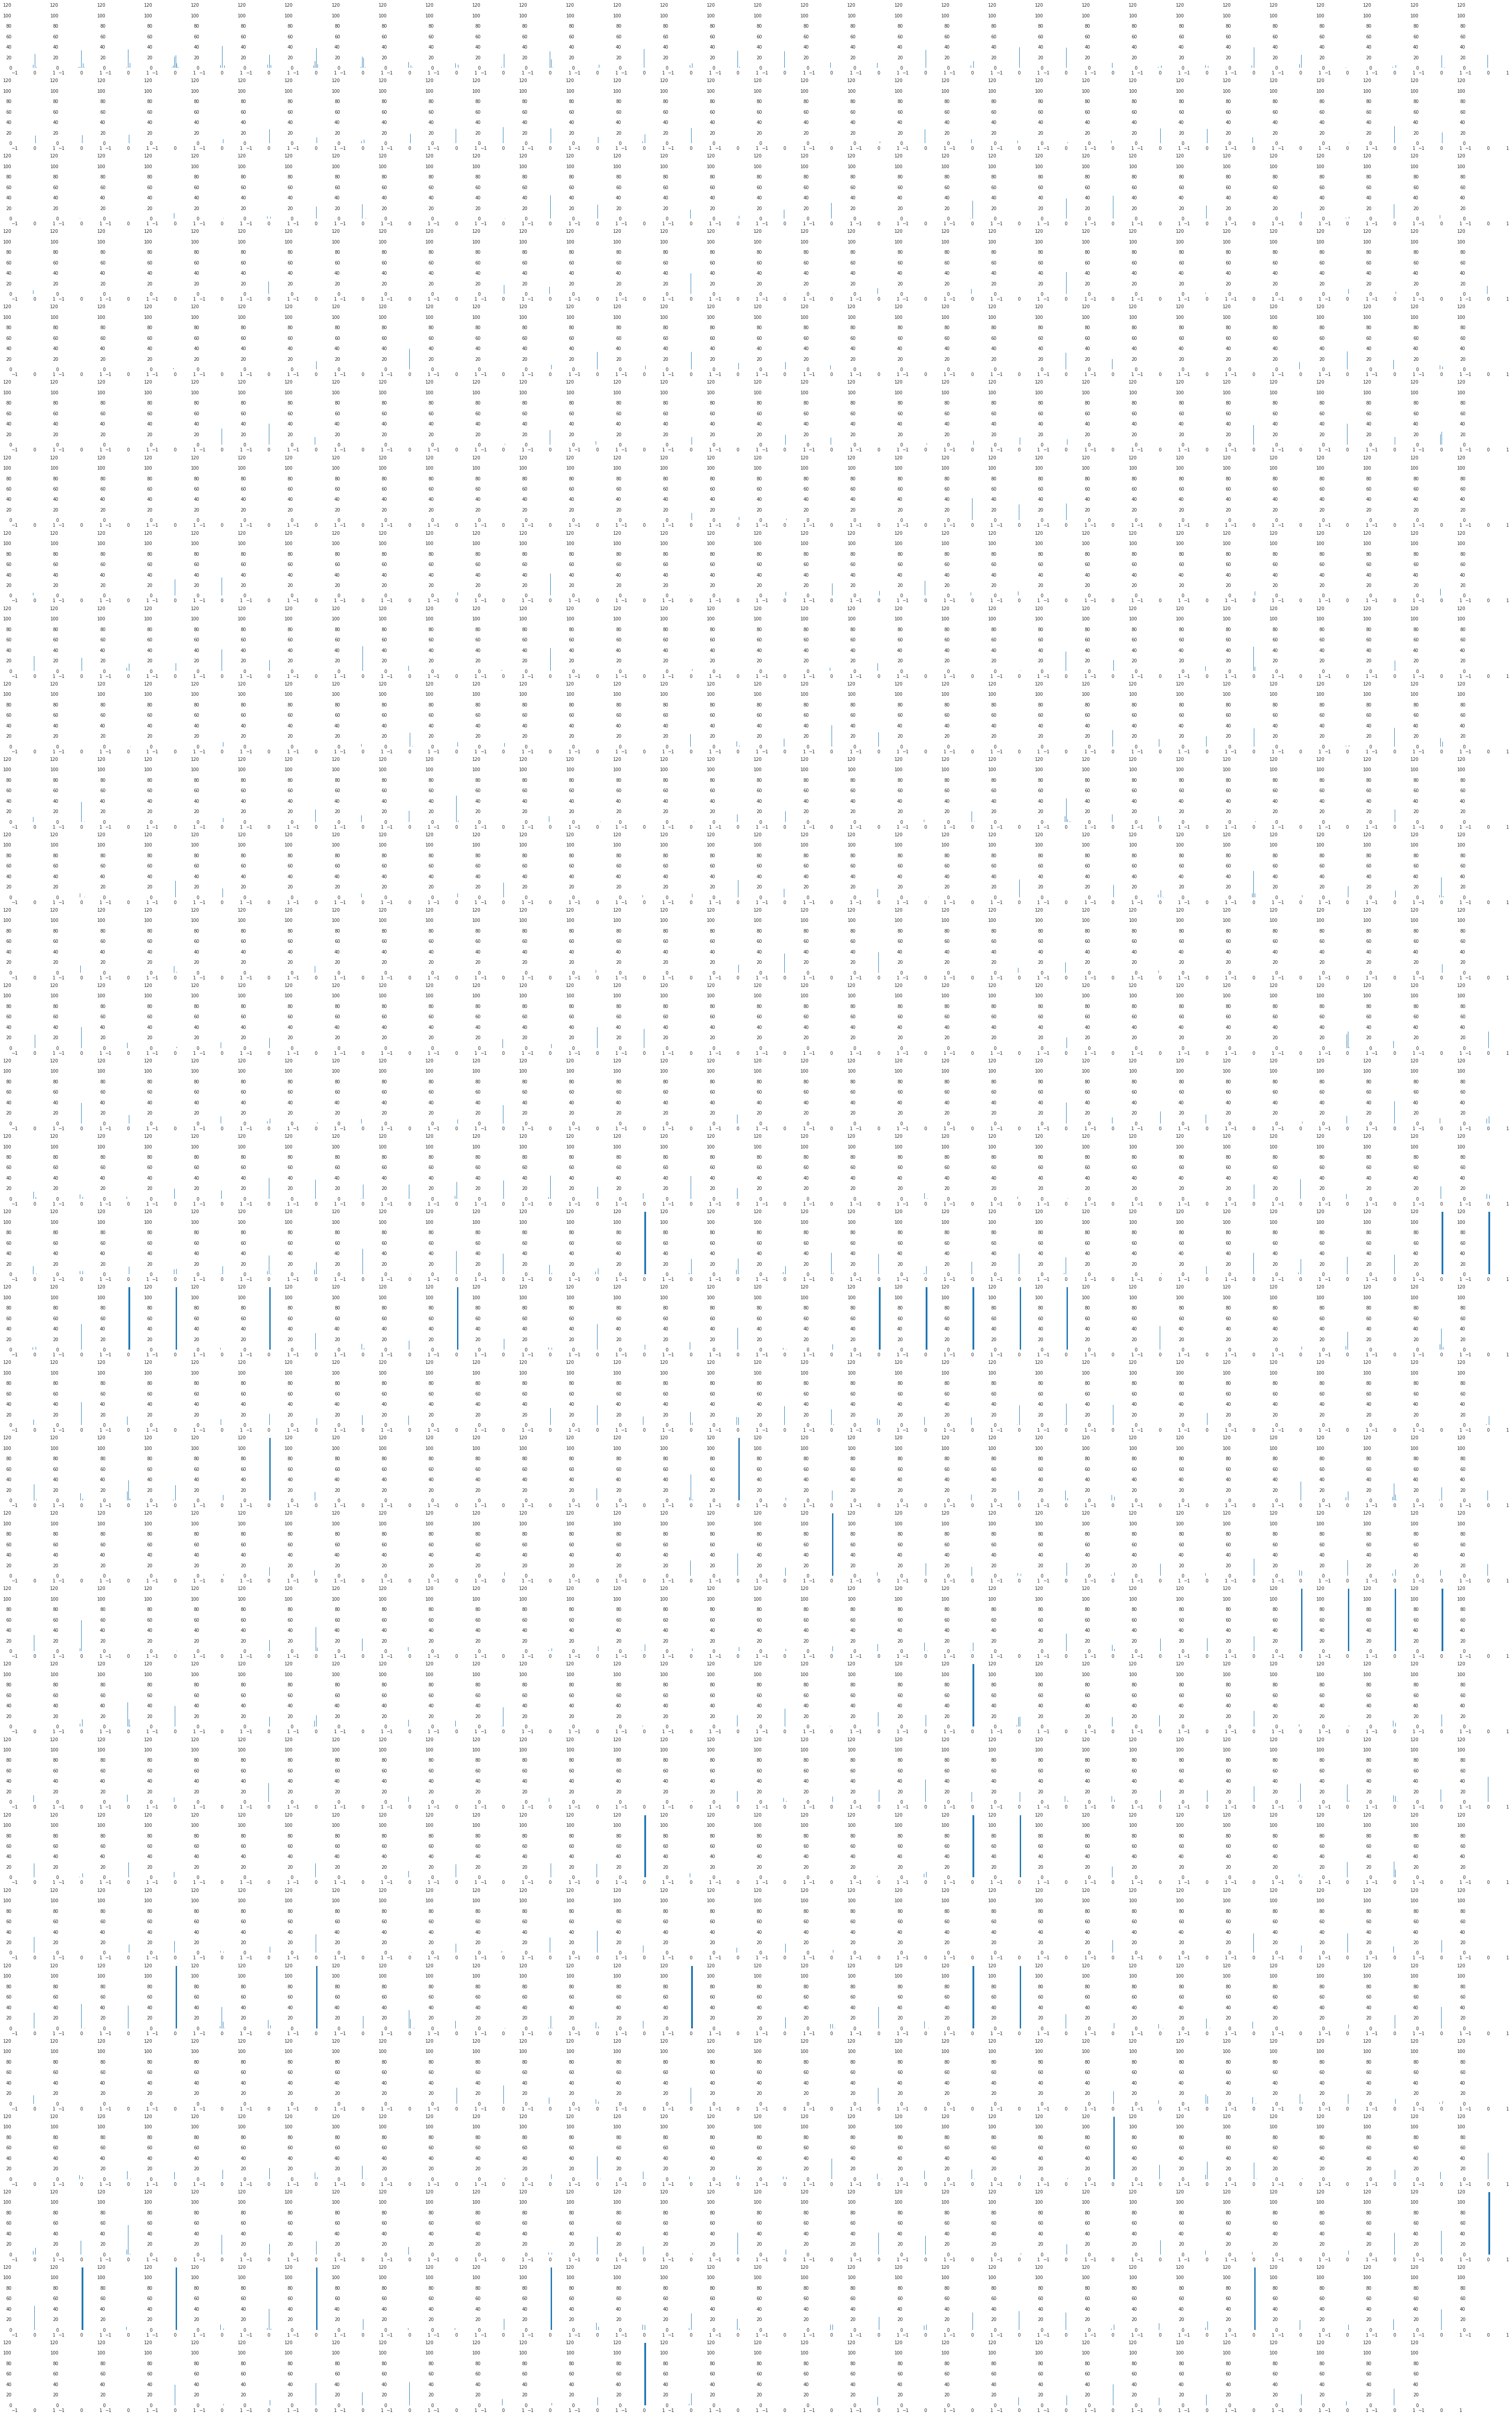

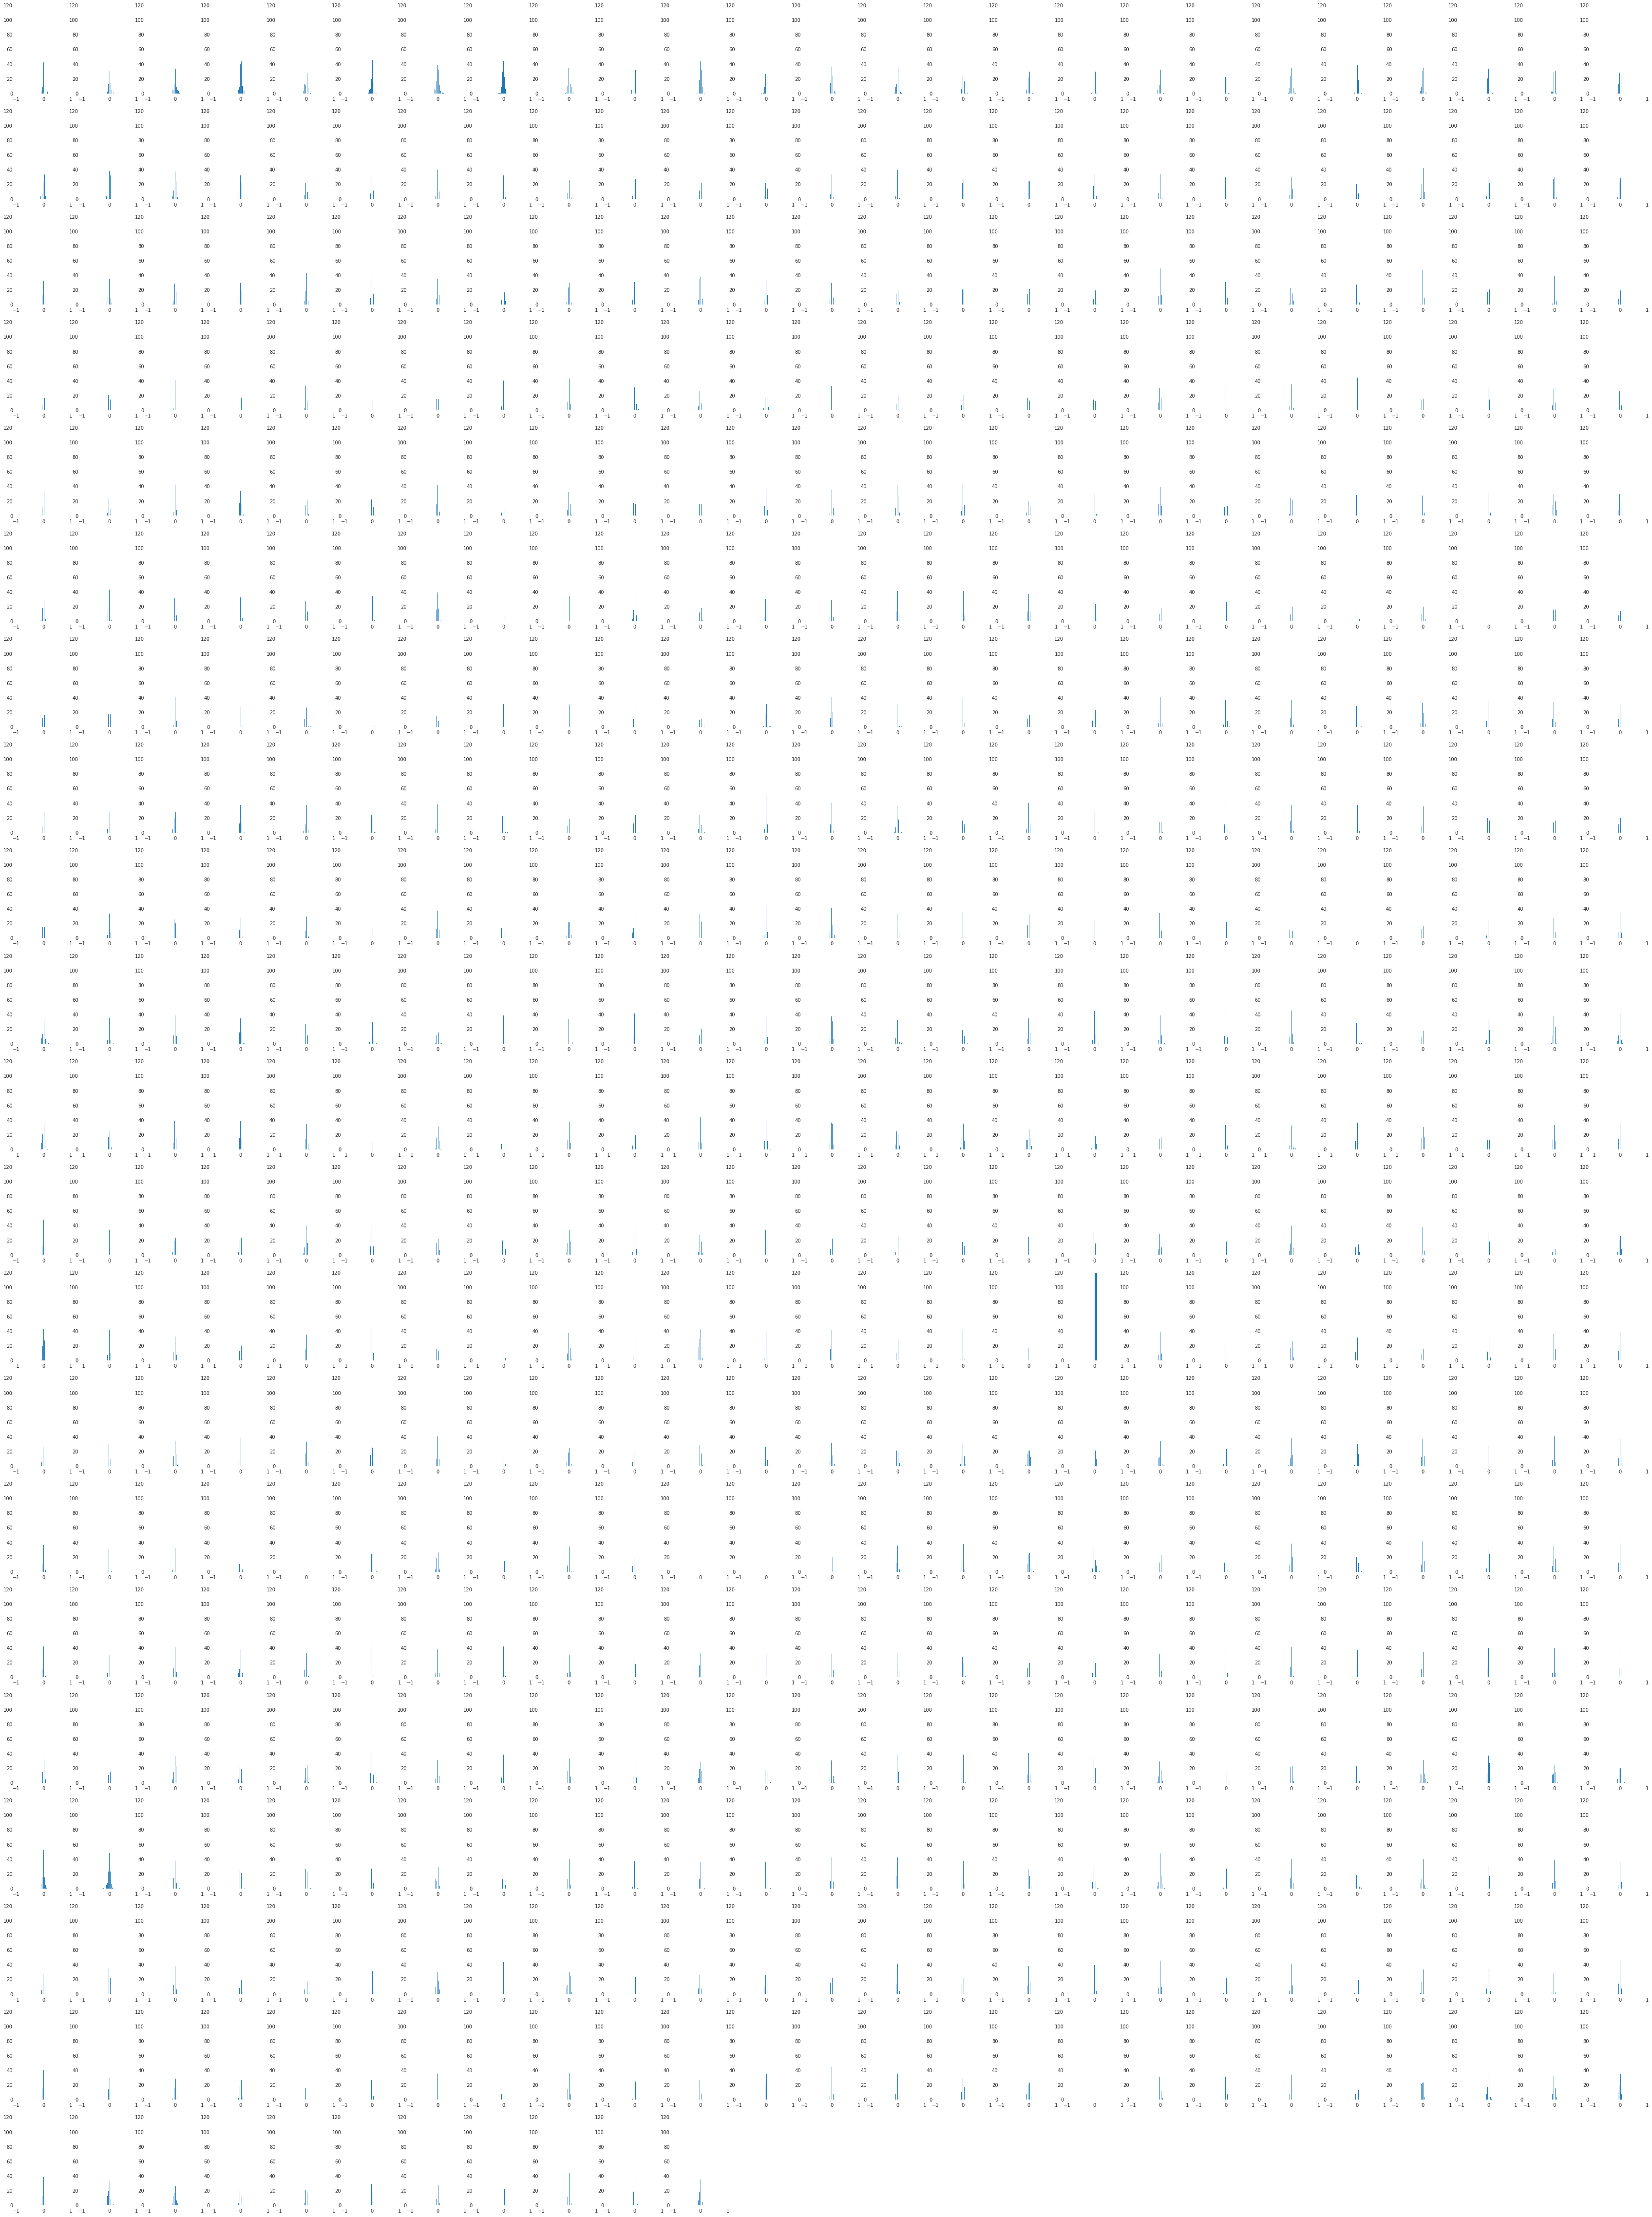

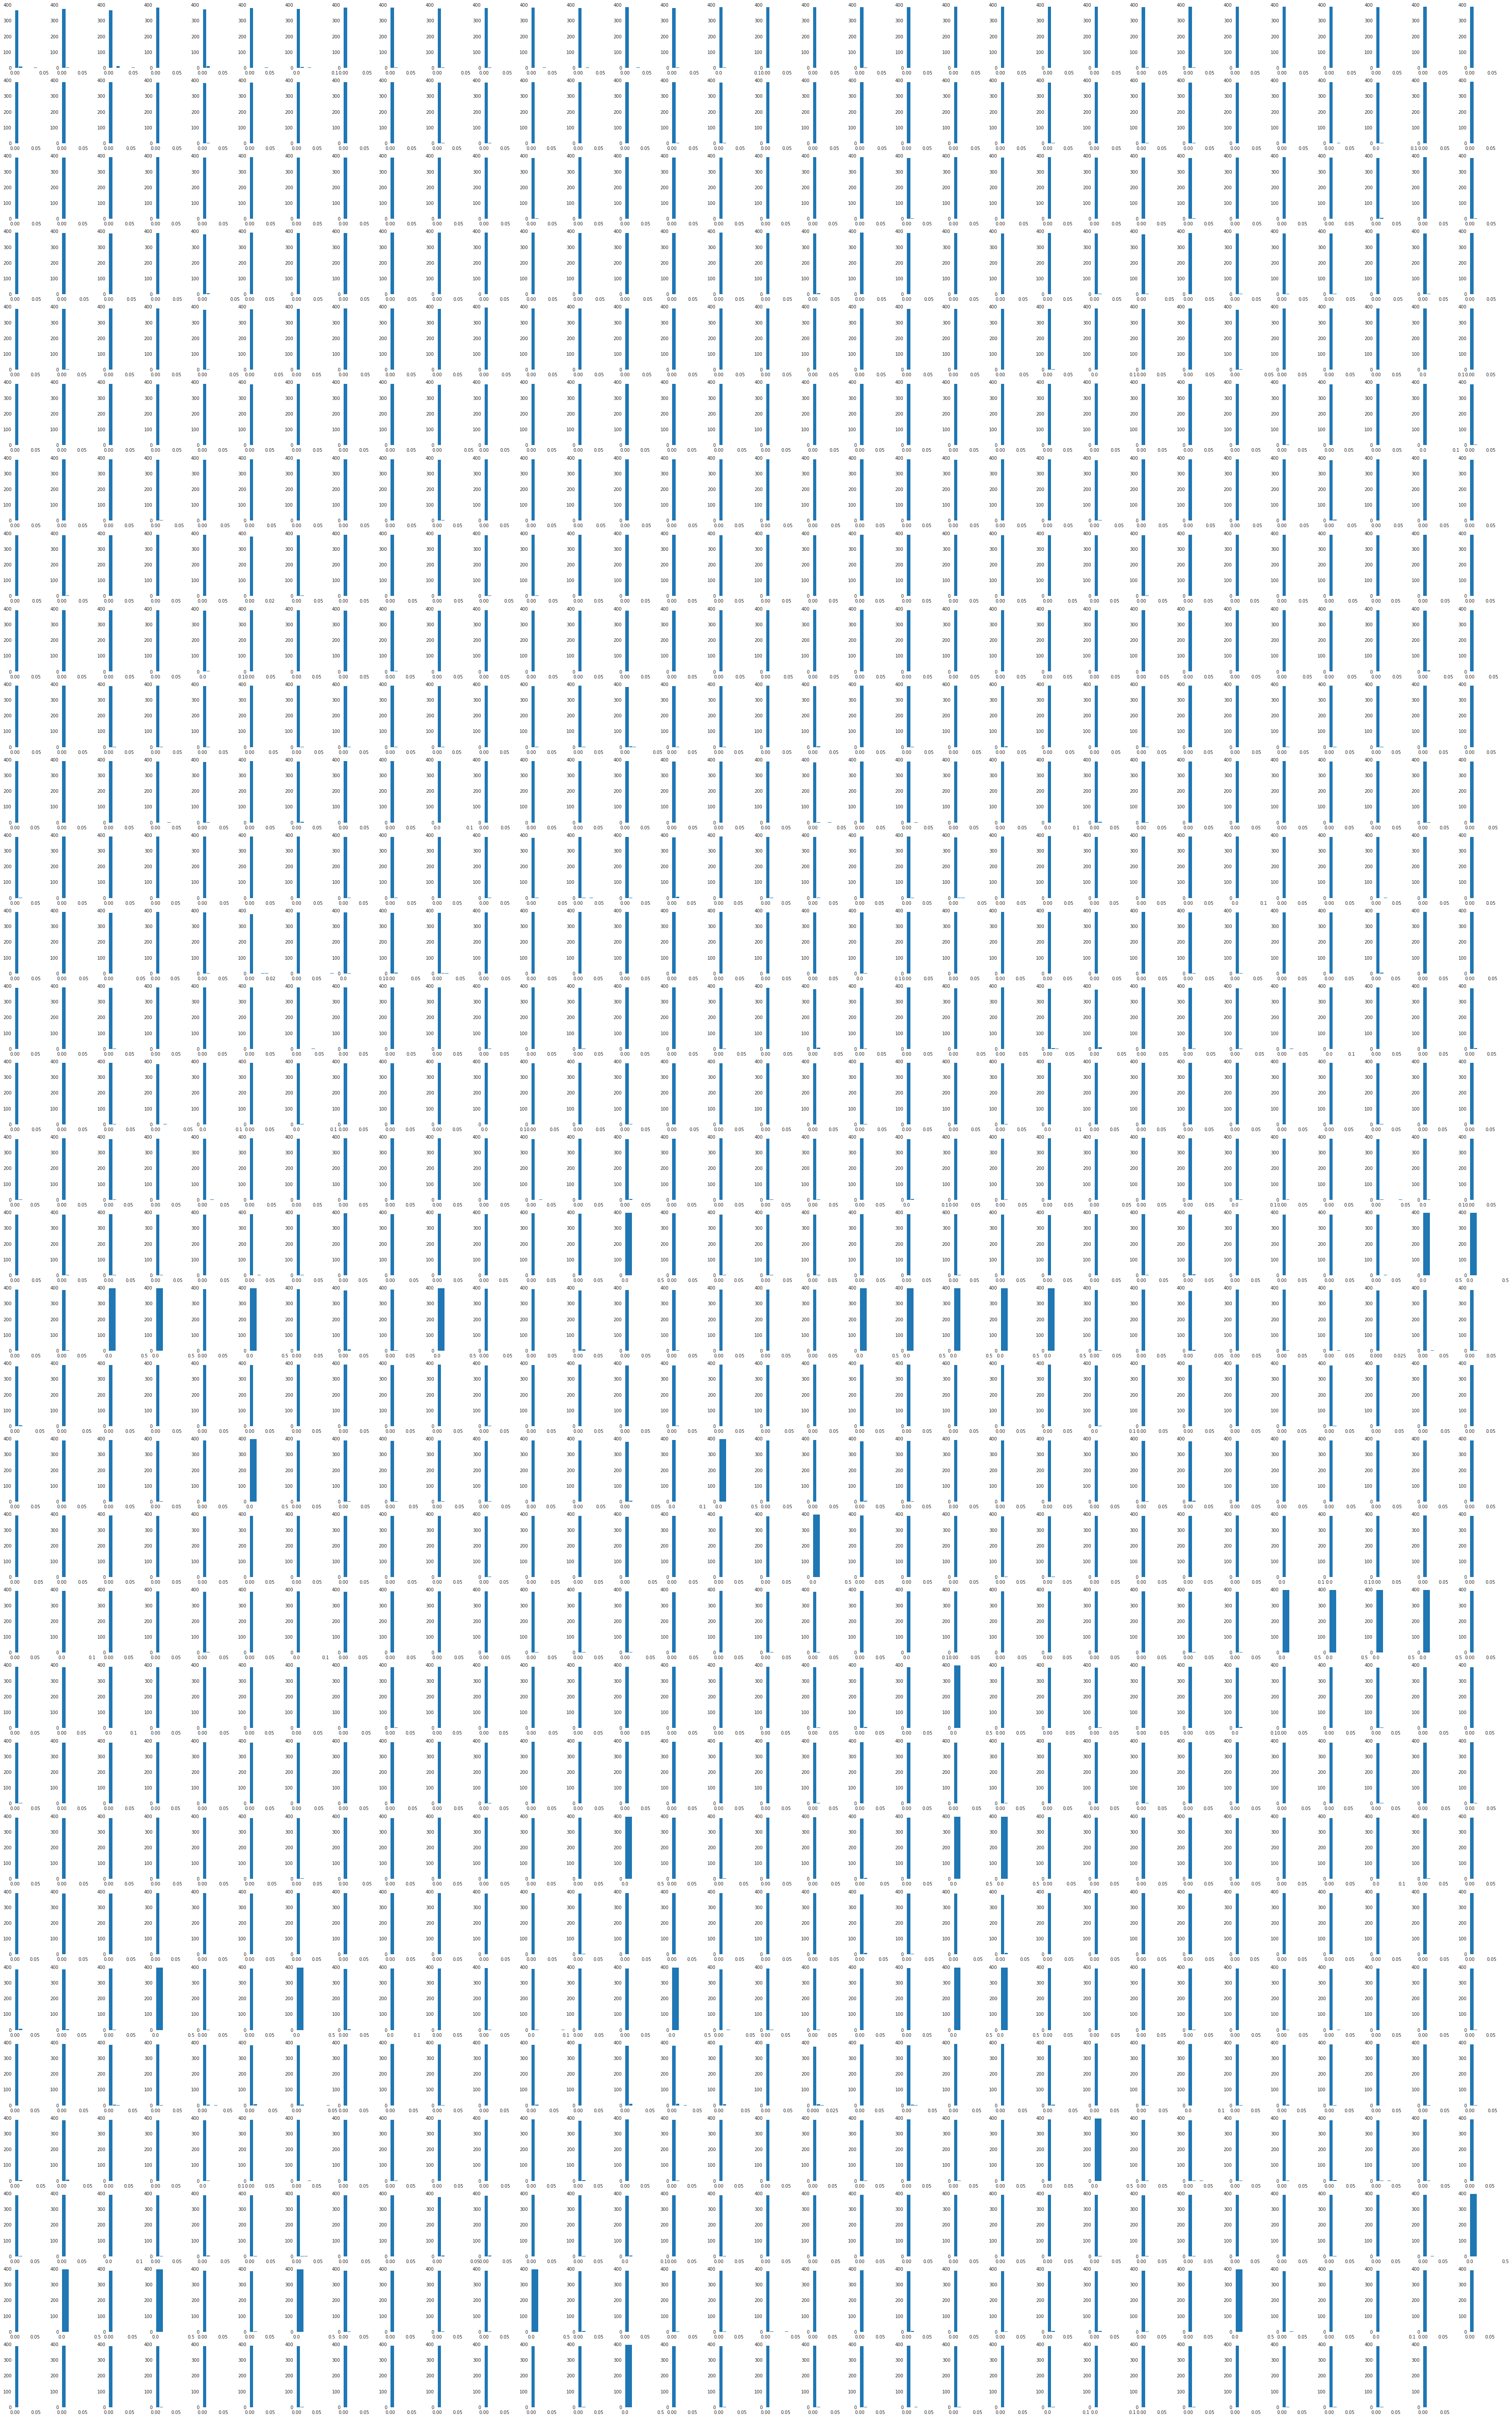

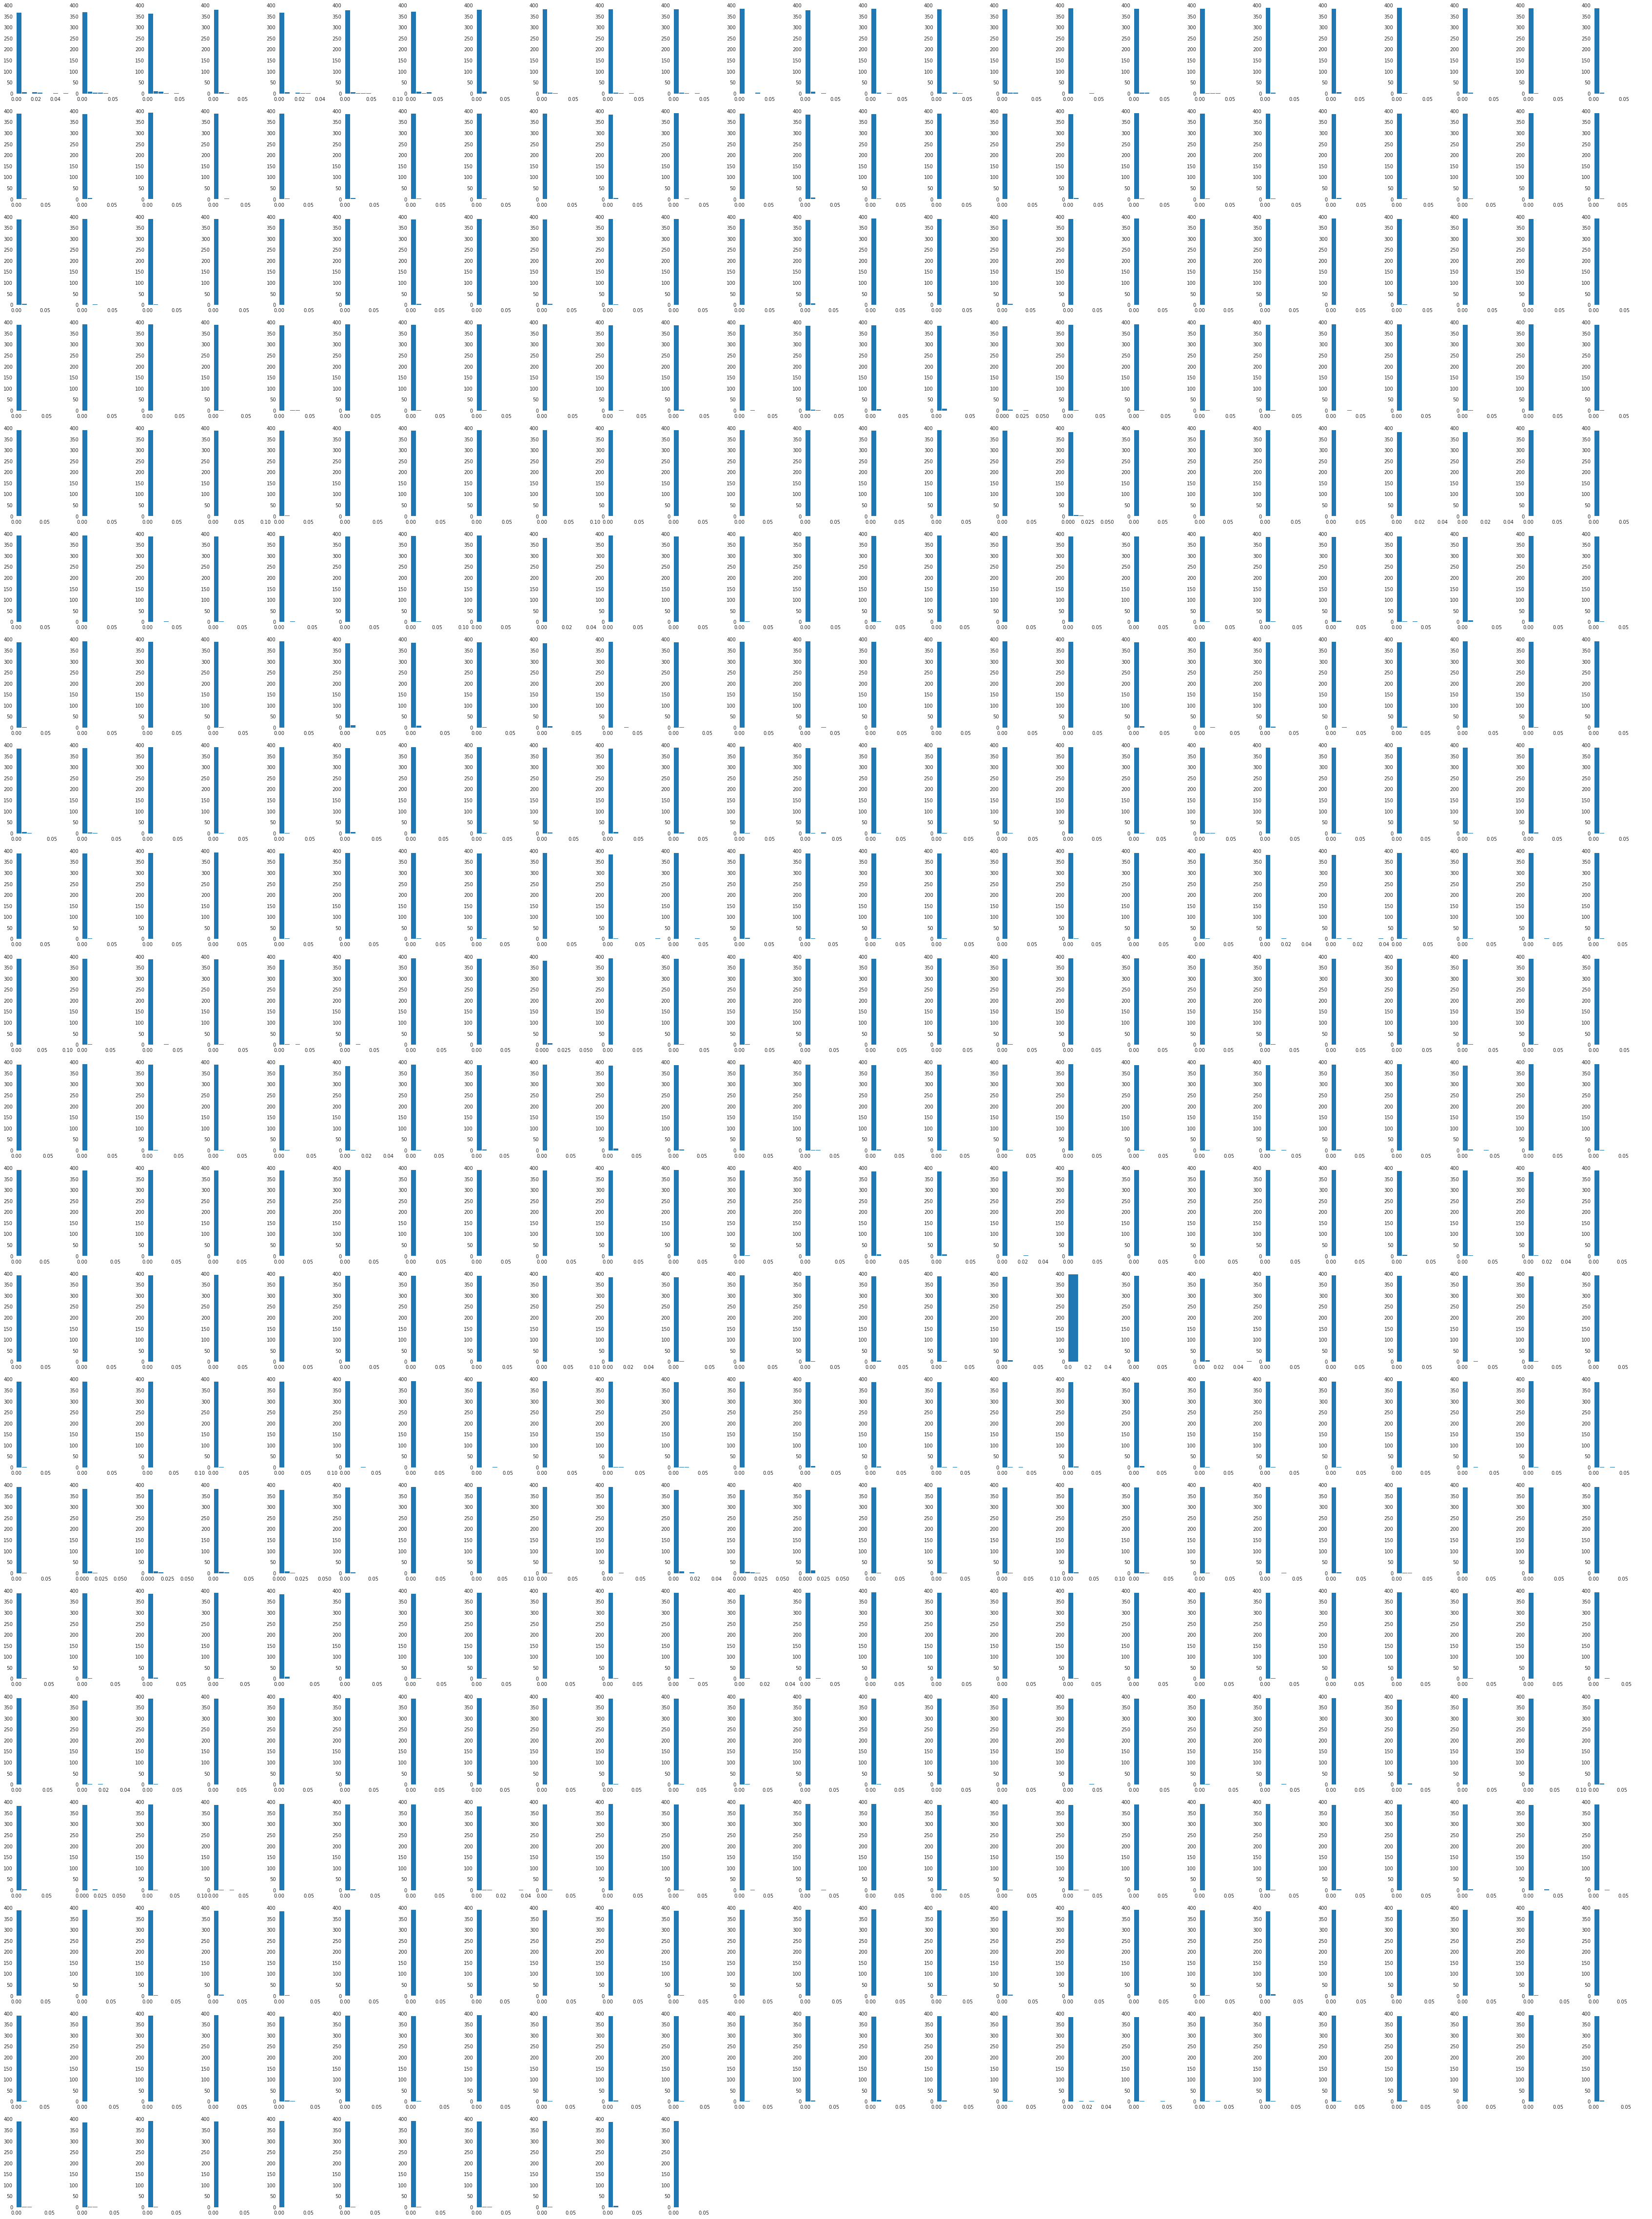

In [ ]:


f = plt.figure(figsize=(60, 99))
for i in range(g_all[env0].shape[0]):
  ax = plt.subplot(32, 32, i + 1)
  ax.hist(g_all[env0][i,:])
  ax.set_xlim([-1,1])
  ax.set_ylim([0,120])

plt.show()
f.savefig("g0_hist_BY_Position_large_world_n_action=10.pdf")
plt.close("all")

f = plt.figure(figsize=(60, 99))
for i in range(g_all[env1].shape[0]):
  ax = plt.subplot(25, 25, i + 1)
  ax.hist(g_all[env1][i,:])
  ax.set_xlim([-1,1])
  ax.set_ylim([0,120])

plt.show()
f.savefig("g1_hist_BY_Position_large_world_n_action=10.pdf")
plt.close("all")

f = plt.figure(figsize=(60, 99))
for i in range(p_all[env0].shape[0]):
  ax = plt.subplot(32, 32, i + 1)
  ax.hist(p_all[env0][i,:])
  ax.set_xlim(left=0)
  ax.set_ylim([0,400])

plt.show()
f.savefig("p0_hist_BY_Position_large_world_n_action=10.pdf")
plt.close("all")

f = plt.figure(figsize=(60, 99))
for i in range(p_all[env1].shape[0]):
  ax = plt.subplot(25, 25, i + 1)
  ax.hist(p_all[env1][i,:])
  ax.set_xlim(left=0)
  ax.set_ylim([0,400])

plt.show()
f.savefig("p1_hist_BY_Position_large_world_n_action=10.pdf")
plt.close("all")

In [ ]:
# Histogram of values g0,g1 and p0,p1

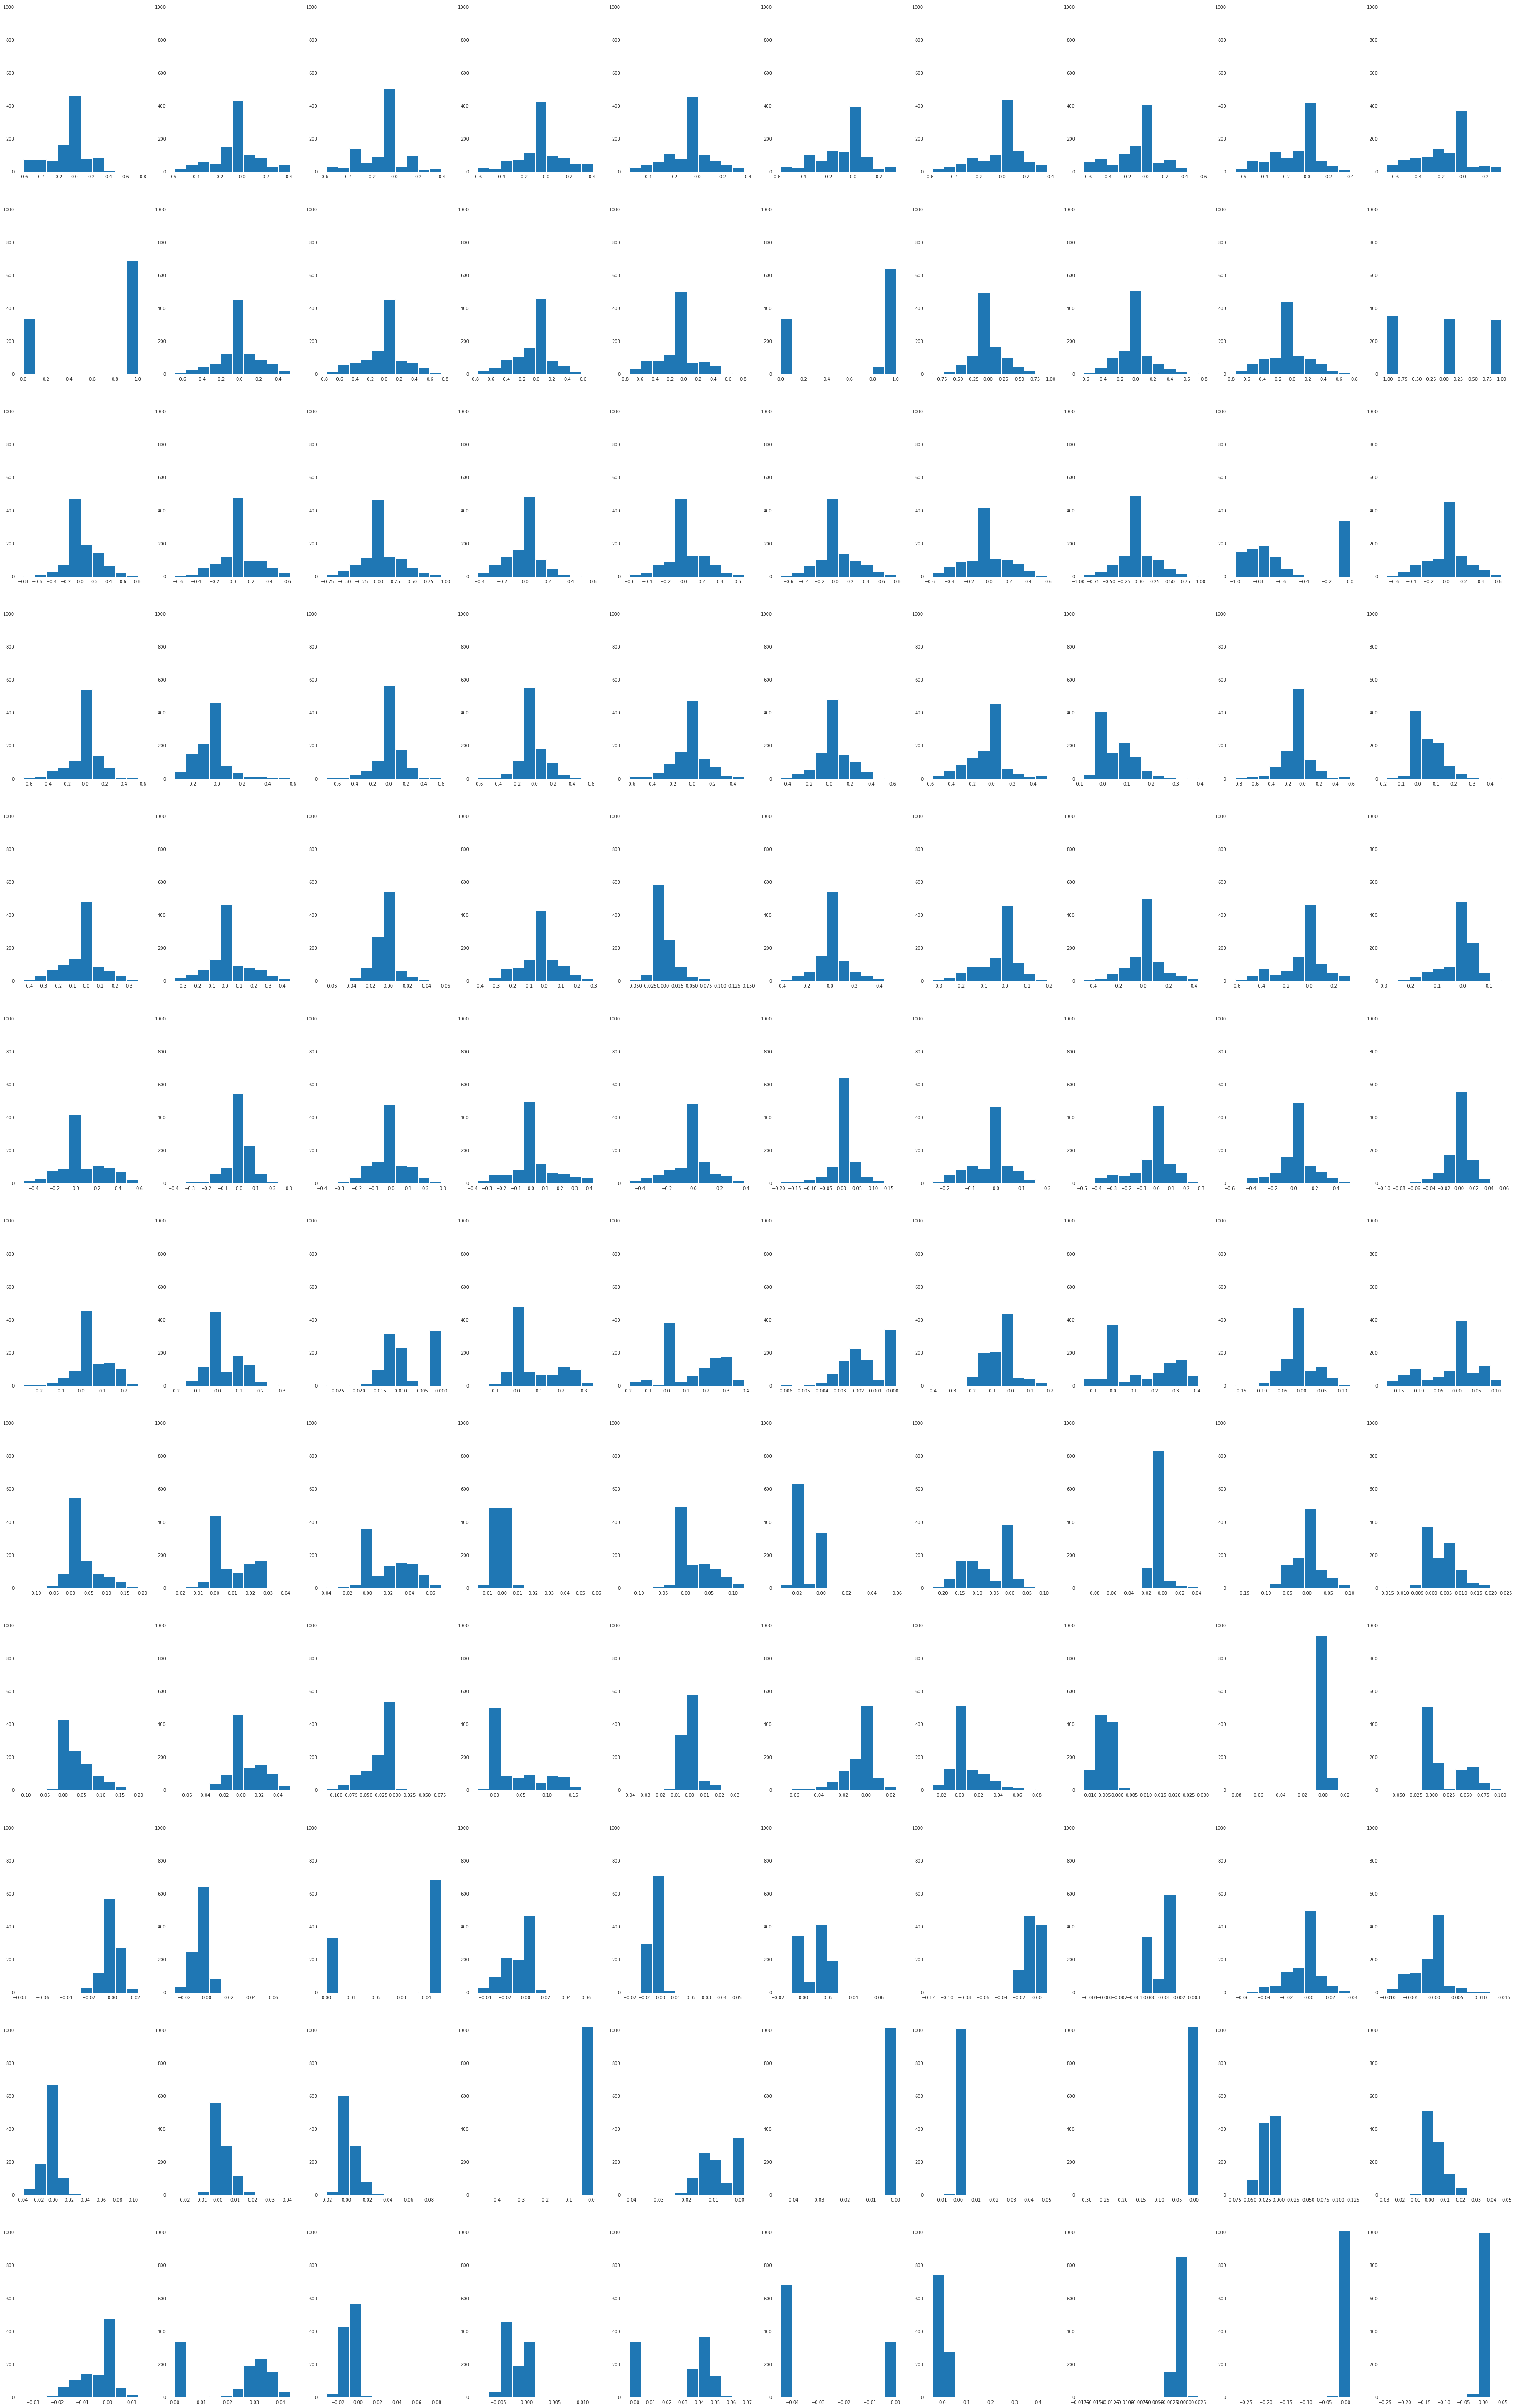

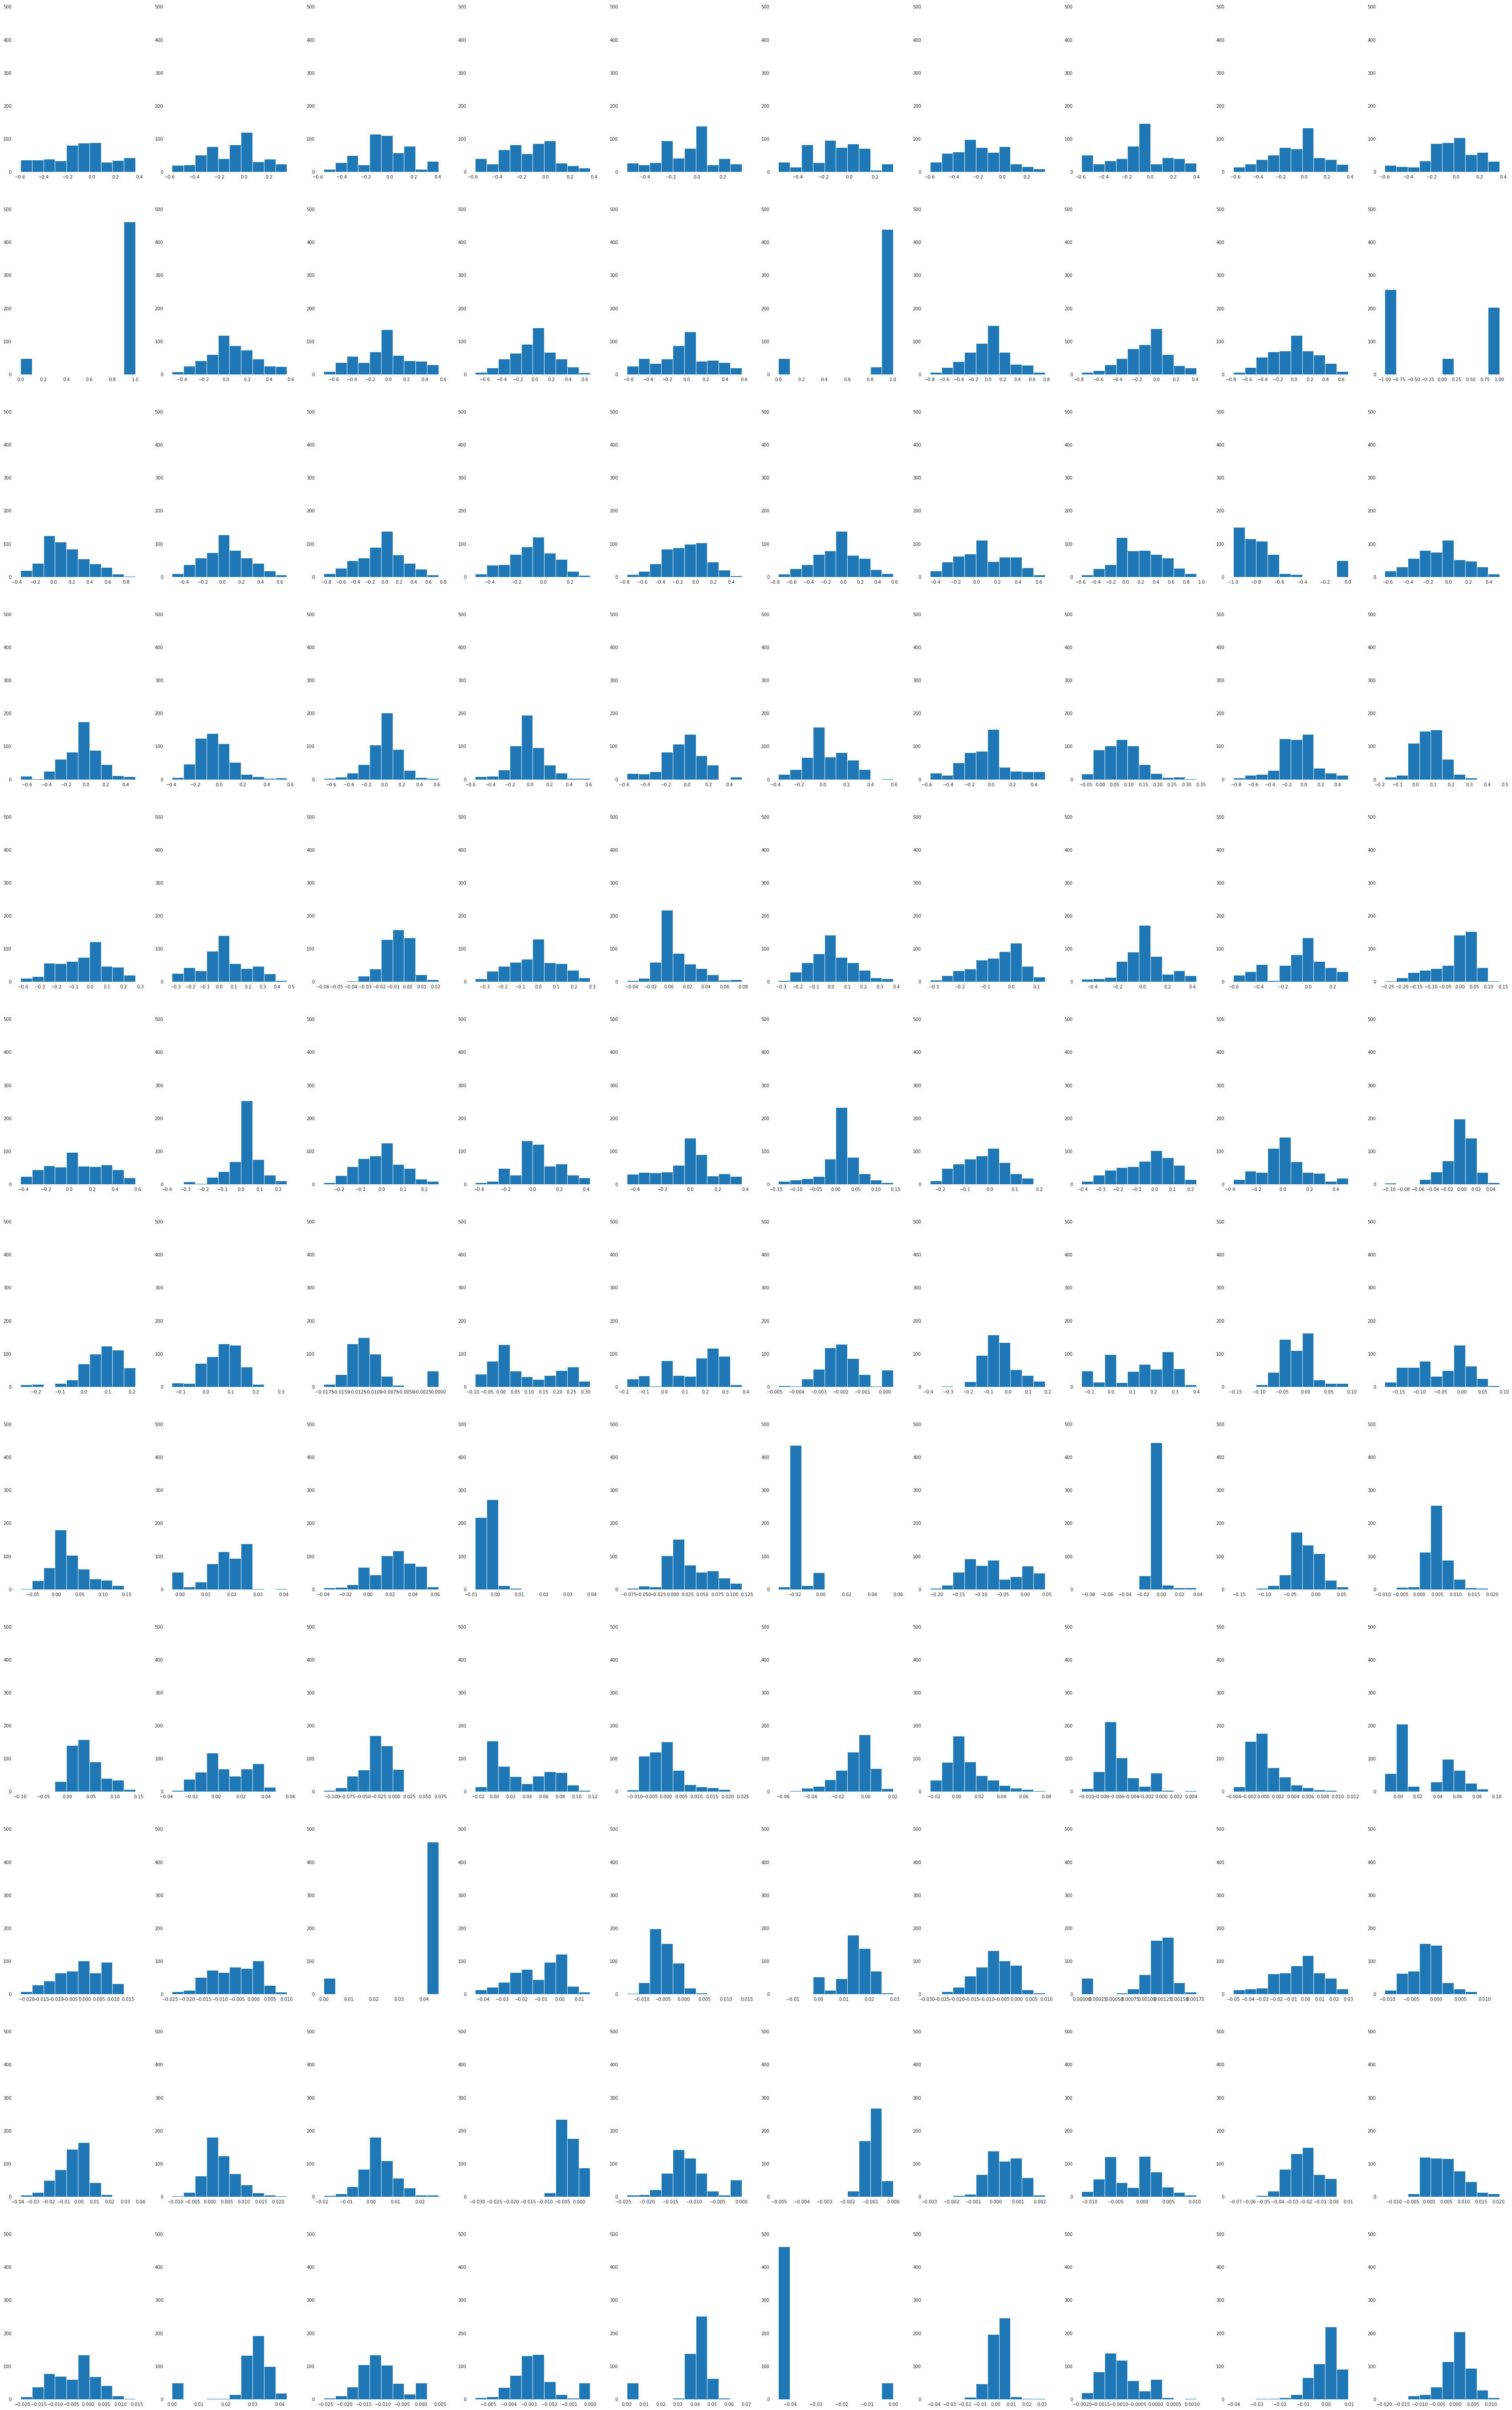

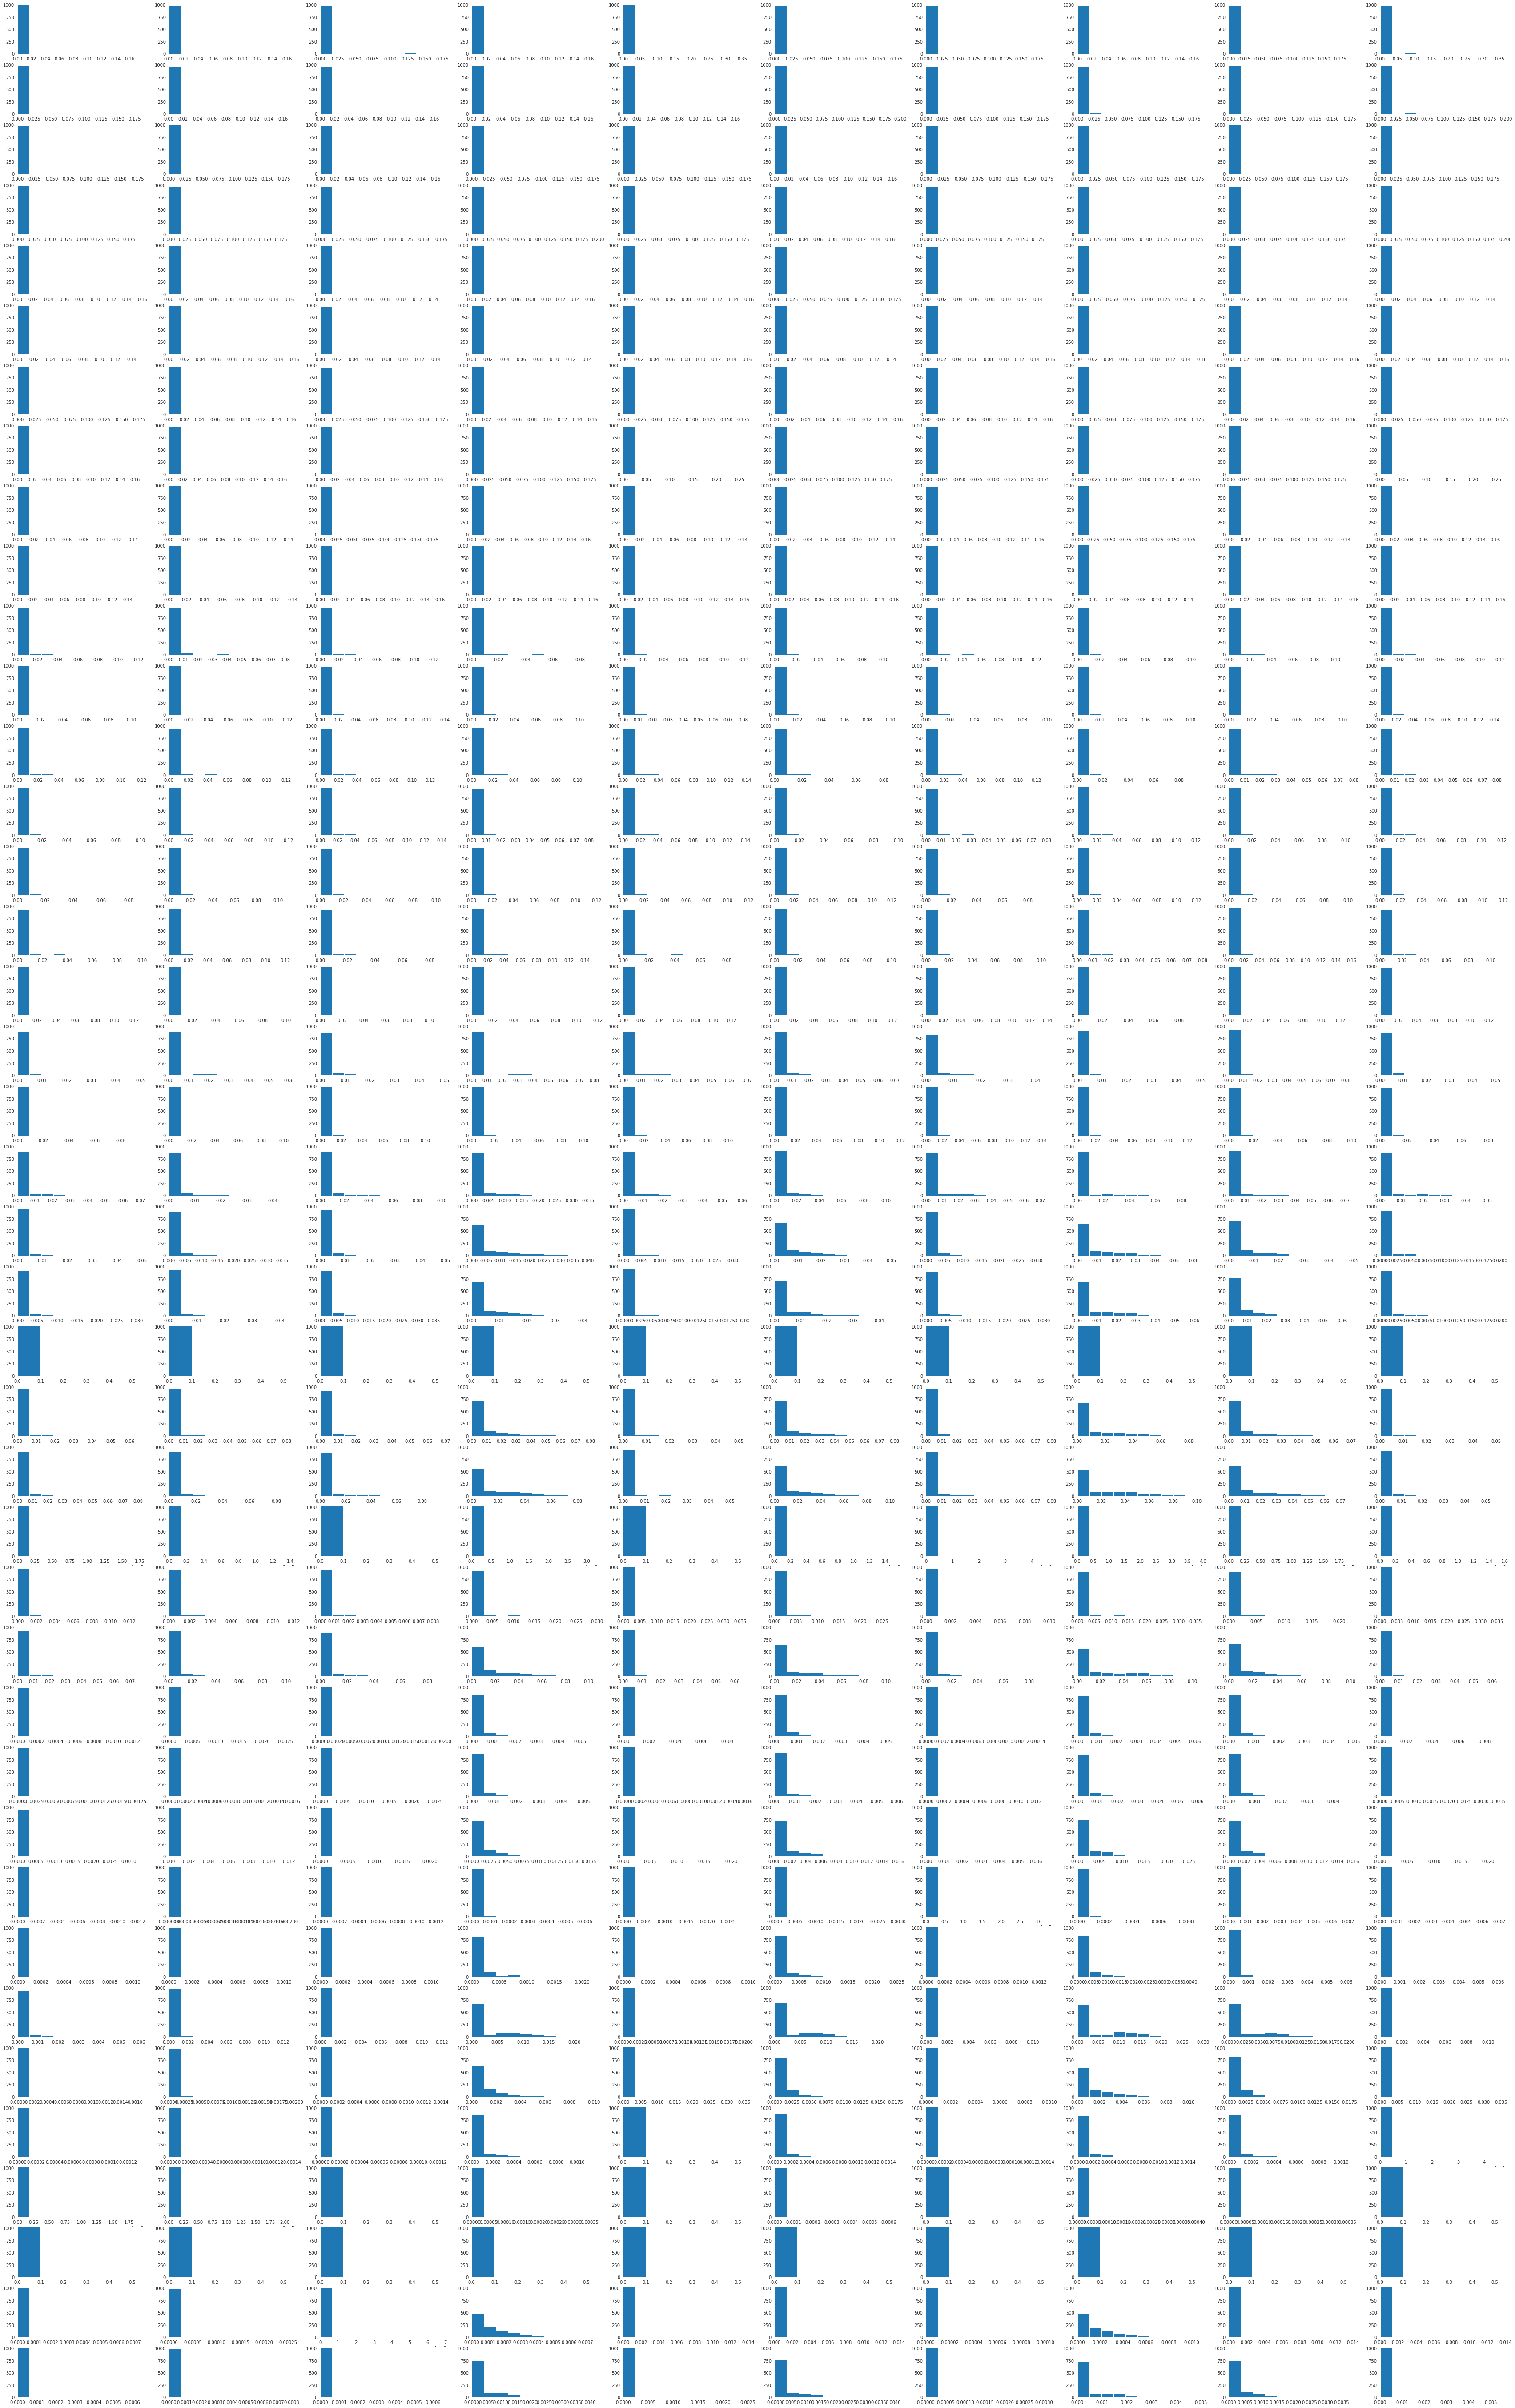

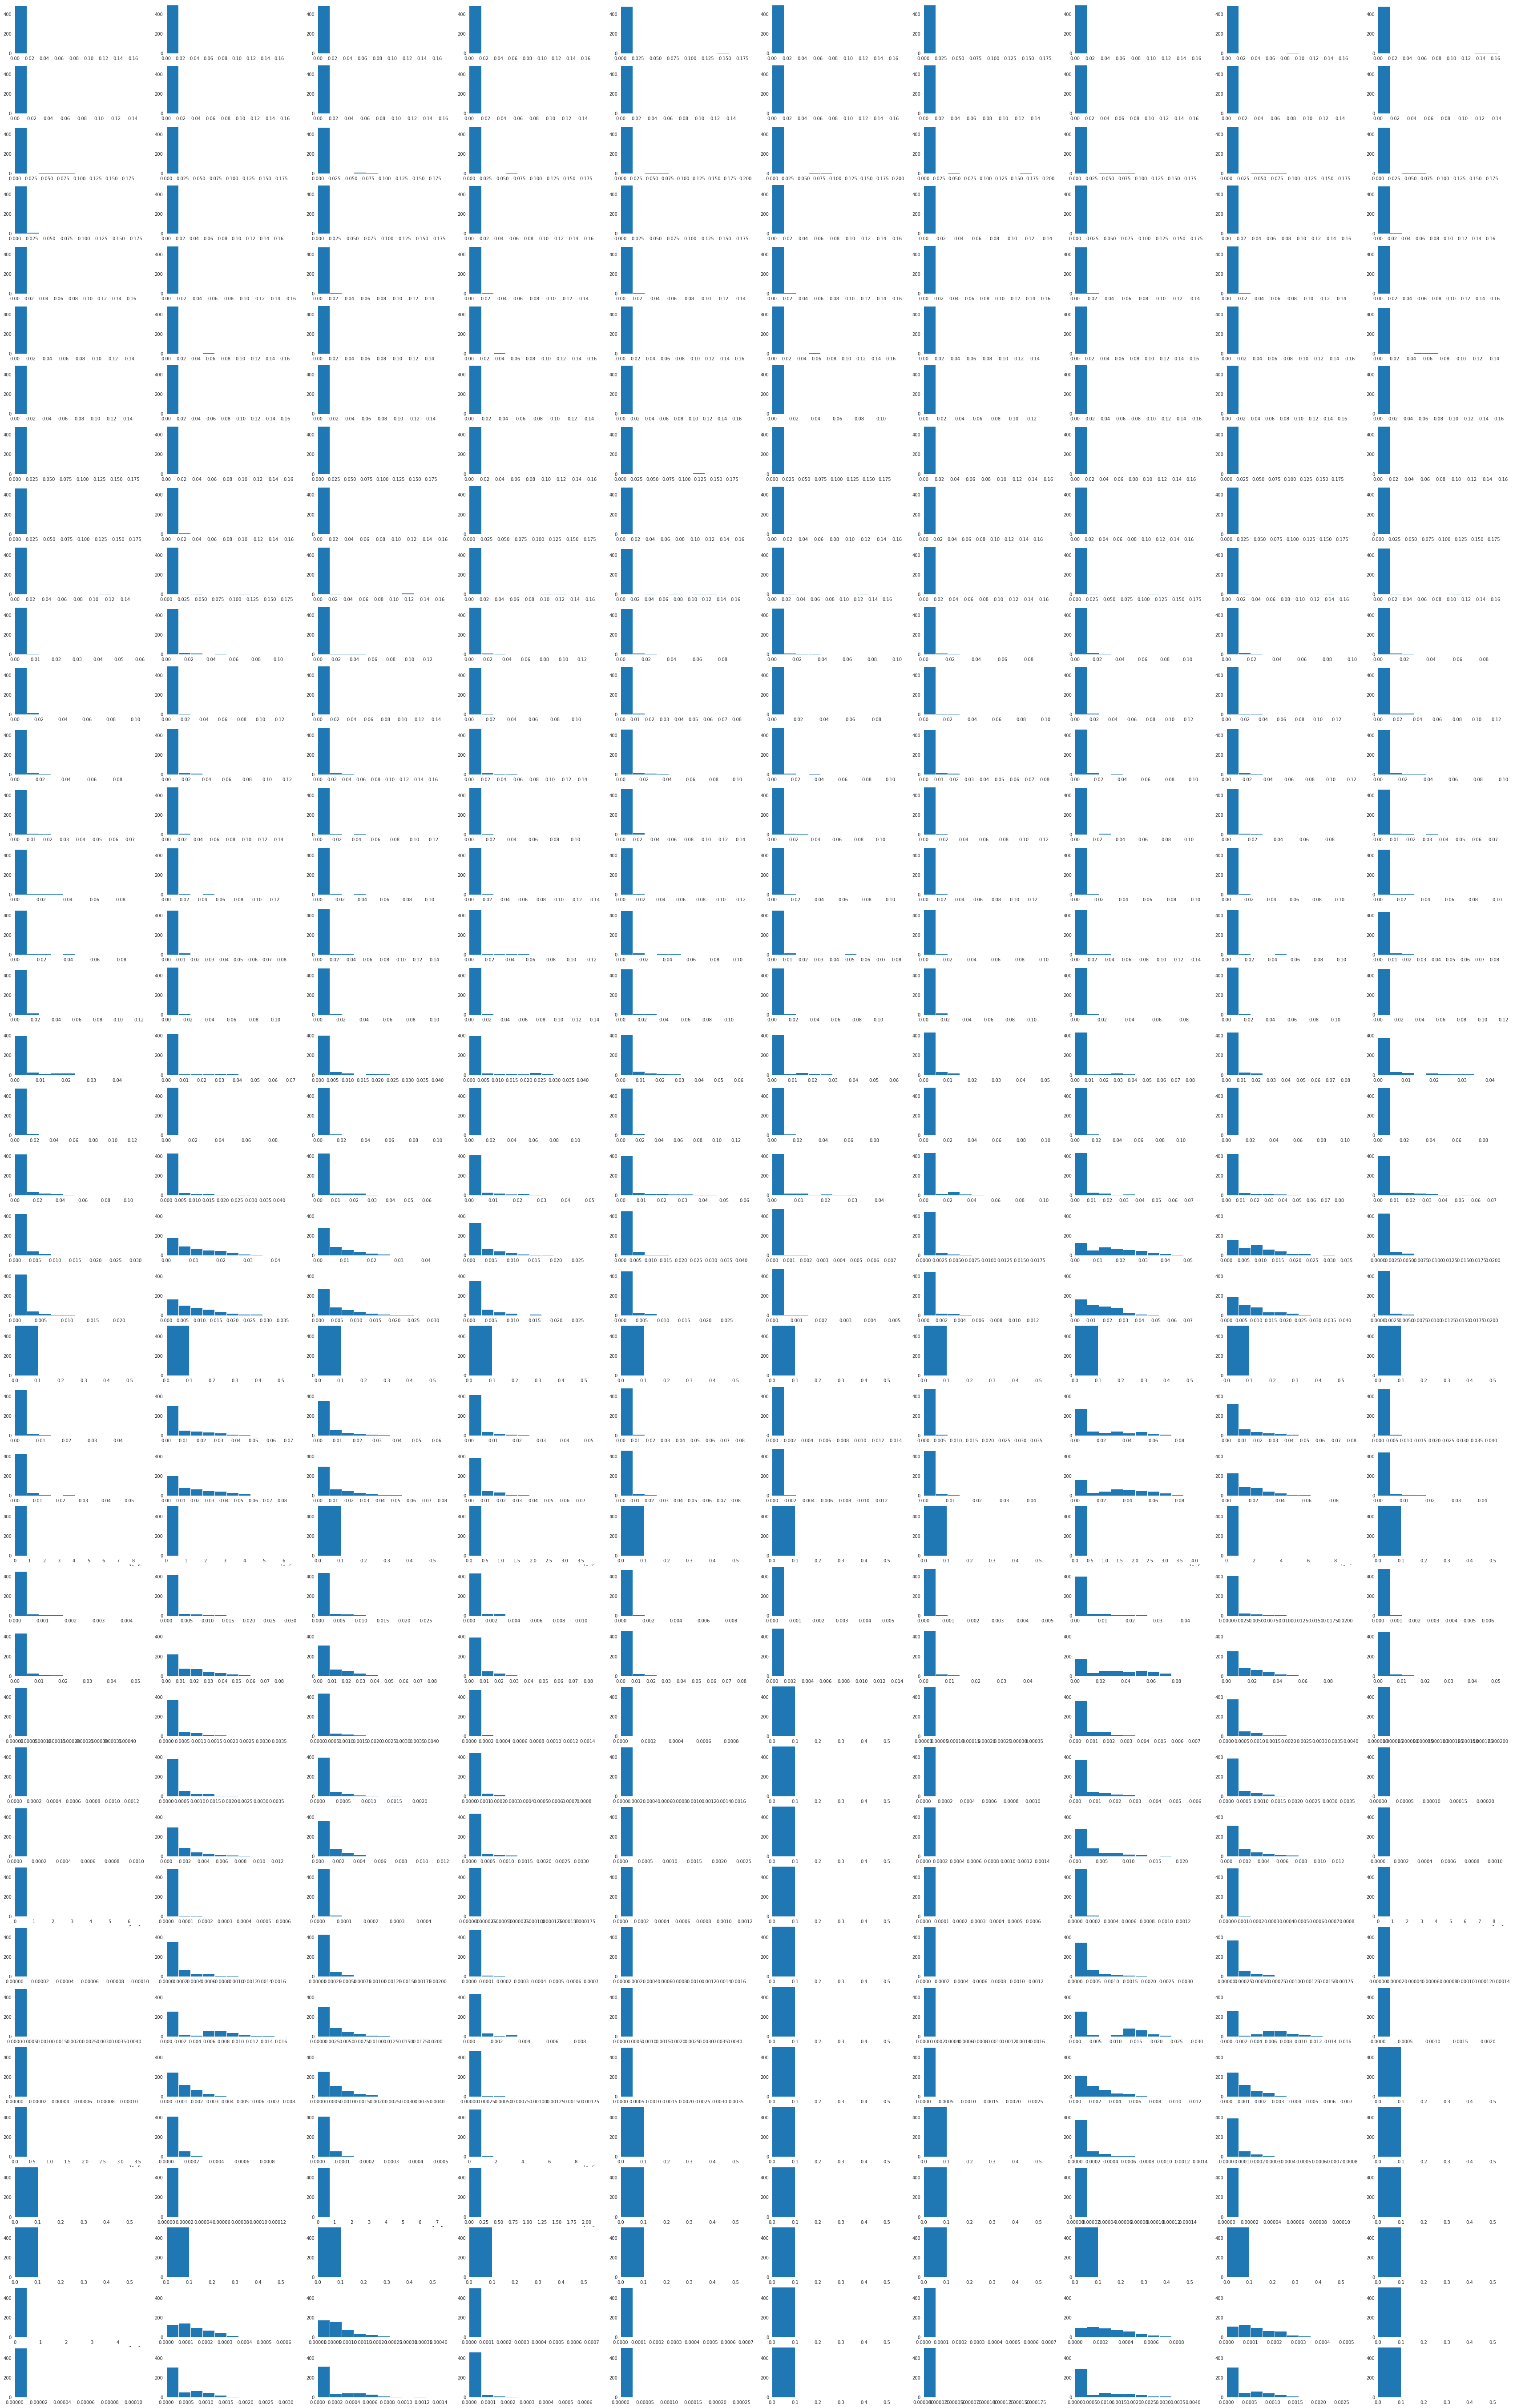

In [ ]:
# g0,g1

f = plt.figure(figsize=(60, 99))
for i in range(120) :

  ax = plt.subplot(12, 10, i + 1)
  s = g_all[env0][:,i]
  ax.hist(s)
  ax.set_ylim([0,2**(params['widths'][env0]+1)-1])
  
plt.show()
f.savefig("g0_hist_large_world_n_action=5.pdf")
plt.close("all")

f = plt.figure(figsize=(60, 99))
for i in range(120) :

  ax = plt.subplot(12, 10, i + 1)
  s = g_all[env1][:,i]
  ax.hist(s)
  #ax.set_xlim(left=-1)
  ax.set_ylim([0,2**(params['widths'][env1]+1)-1])
  
plt.show()
f.savefig("g1_hist_large_world_n_action=5.pdf")
plt.close("all")


# p0,p1

f = plt.figure(figsize=(60, 99))
for i in range(400) :

  ax = plt.subplot(40, 10, i + 1)
  s = p_all[env0][:,i]
  ax.hist(s)
  ax.set_xlim(left=0)
  ax.set_ylim([0,2**(params['widths'][env0]+1)-1])
  
plt.show()
f.savefig("p0_hist_large_world_n_action=5.pdf")
plt.close("all")

f = plt.figure(figsize=(60, 99))
for i in range(400) :

  ax = plt.subplot(40, 10, i + 1)
  s = p_all[env1][:,i]
  ax.hist(s)
  ax.set_xlim(left=0)
  ax.set_ylim([0,2**(params['widths'][env1]+1)-1])
  
plt.show()
f.savefig("p1_hist_large_world_n_action=5.pdf")
plt.close("all")

In [ ]:
# Generate random grid cells

In [ ]:

fake_env_size=9
random.seed(129)
test=np.array([[random.uniform(-1,1) for j in range(120)]])
test
for i in range(2**(fake_env_size+1)-2) :
  random.seed(i)
  test=np.concatenate((test,np.array([[random.uniform(-1,1) for j in range(120)]])))
f = plt.figure(figsize=(60, 80))

for i in range(120):
  ax = plt.subplot(12, 10, i + 1)
  G=nx.Graph()
  for j in range(2**(fake_env_size)-1):  
    G.add_edges_from([(j,2*j+1),(j,2*j+2)])
  pos = hierarchy_pos(G,0)    
  nx.draw(G, pos=pos, with_labels=False,node_color=test[:,i],cmap=plt.cm.jet,vmin=test[:,i].min(), vmax=test[:,i].max(),edge_color="white" )
plt.show()
f.savefig("g_cell_random_env_size=" + str(fake_env_size)+".pdf")
plt.close("all")

In [ ]:
# fake_env_size=9
random.seed(129)
test=np.array([np.random.gamma(shape, scale, 400)])
test
for i in range(2**(fake_env_size+1)-2) :
  random.seed(i)
  test=np.concatenate((test,np.array([np.random.gamma(shape, scale, 400)])))
f = plt.figure(figsize=(60, 99))

for i in range(400):
  ax = plt.subplot(40, 10, i + 1)
  G=nx.Graph()
  for j in range(2**(fake_env_size)-1):  
    G.add_edges_from([(j,2*j+1),(j,2*j+2)])
  pos = hierarchy_pos(G,0)    
  nx.draw(G, pos=pos, with_labels=False,node_color=test[:,i],cmap=plt.cm.jet,vmin=test[:,i].min(), vmax=test[:,i].max(),edge_color="white" )
plt.show()
f.savefig("p_cell_random_env_size=" + str(fake_env_size)+".pdf")
plt.close("all")

In [ ]:
# g0

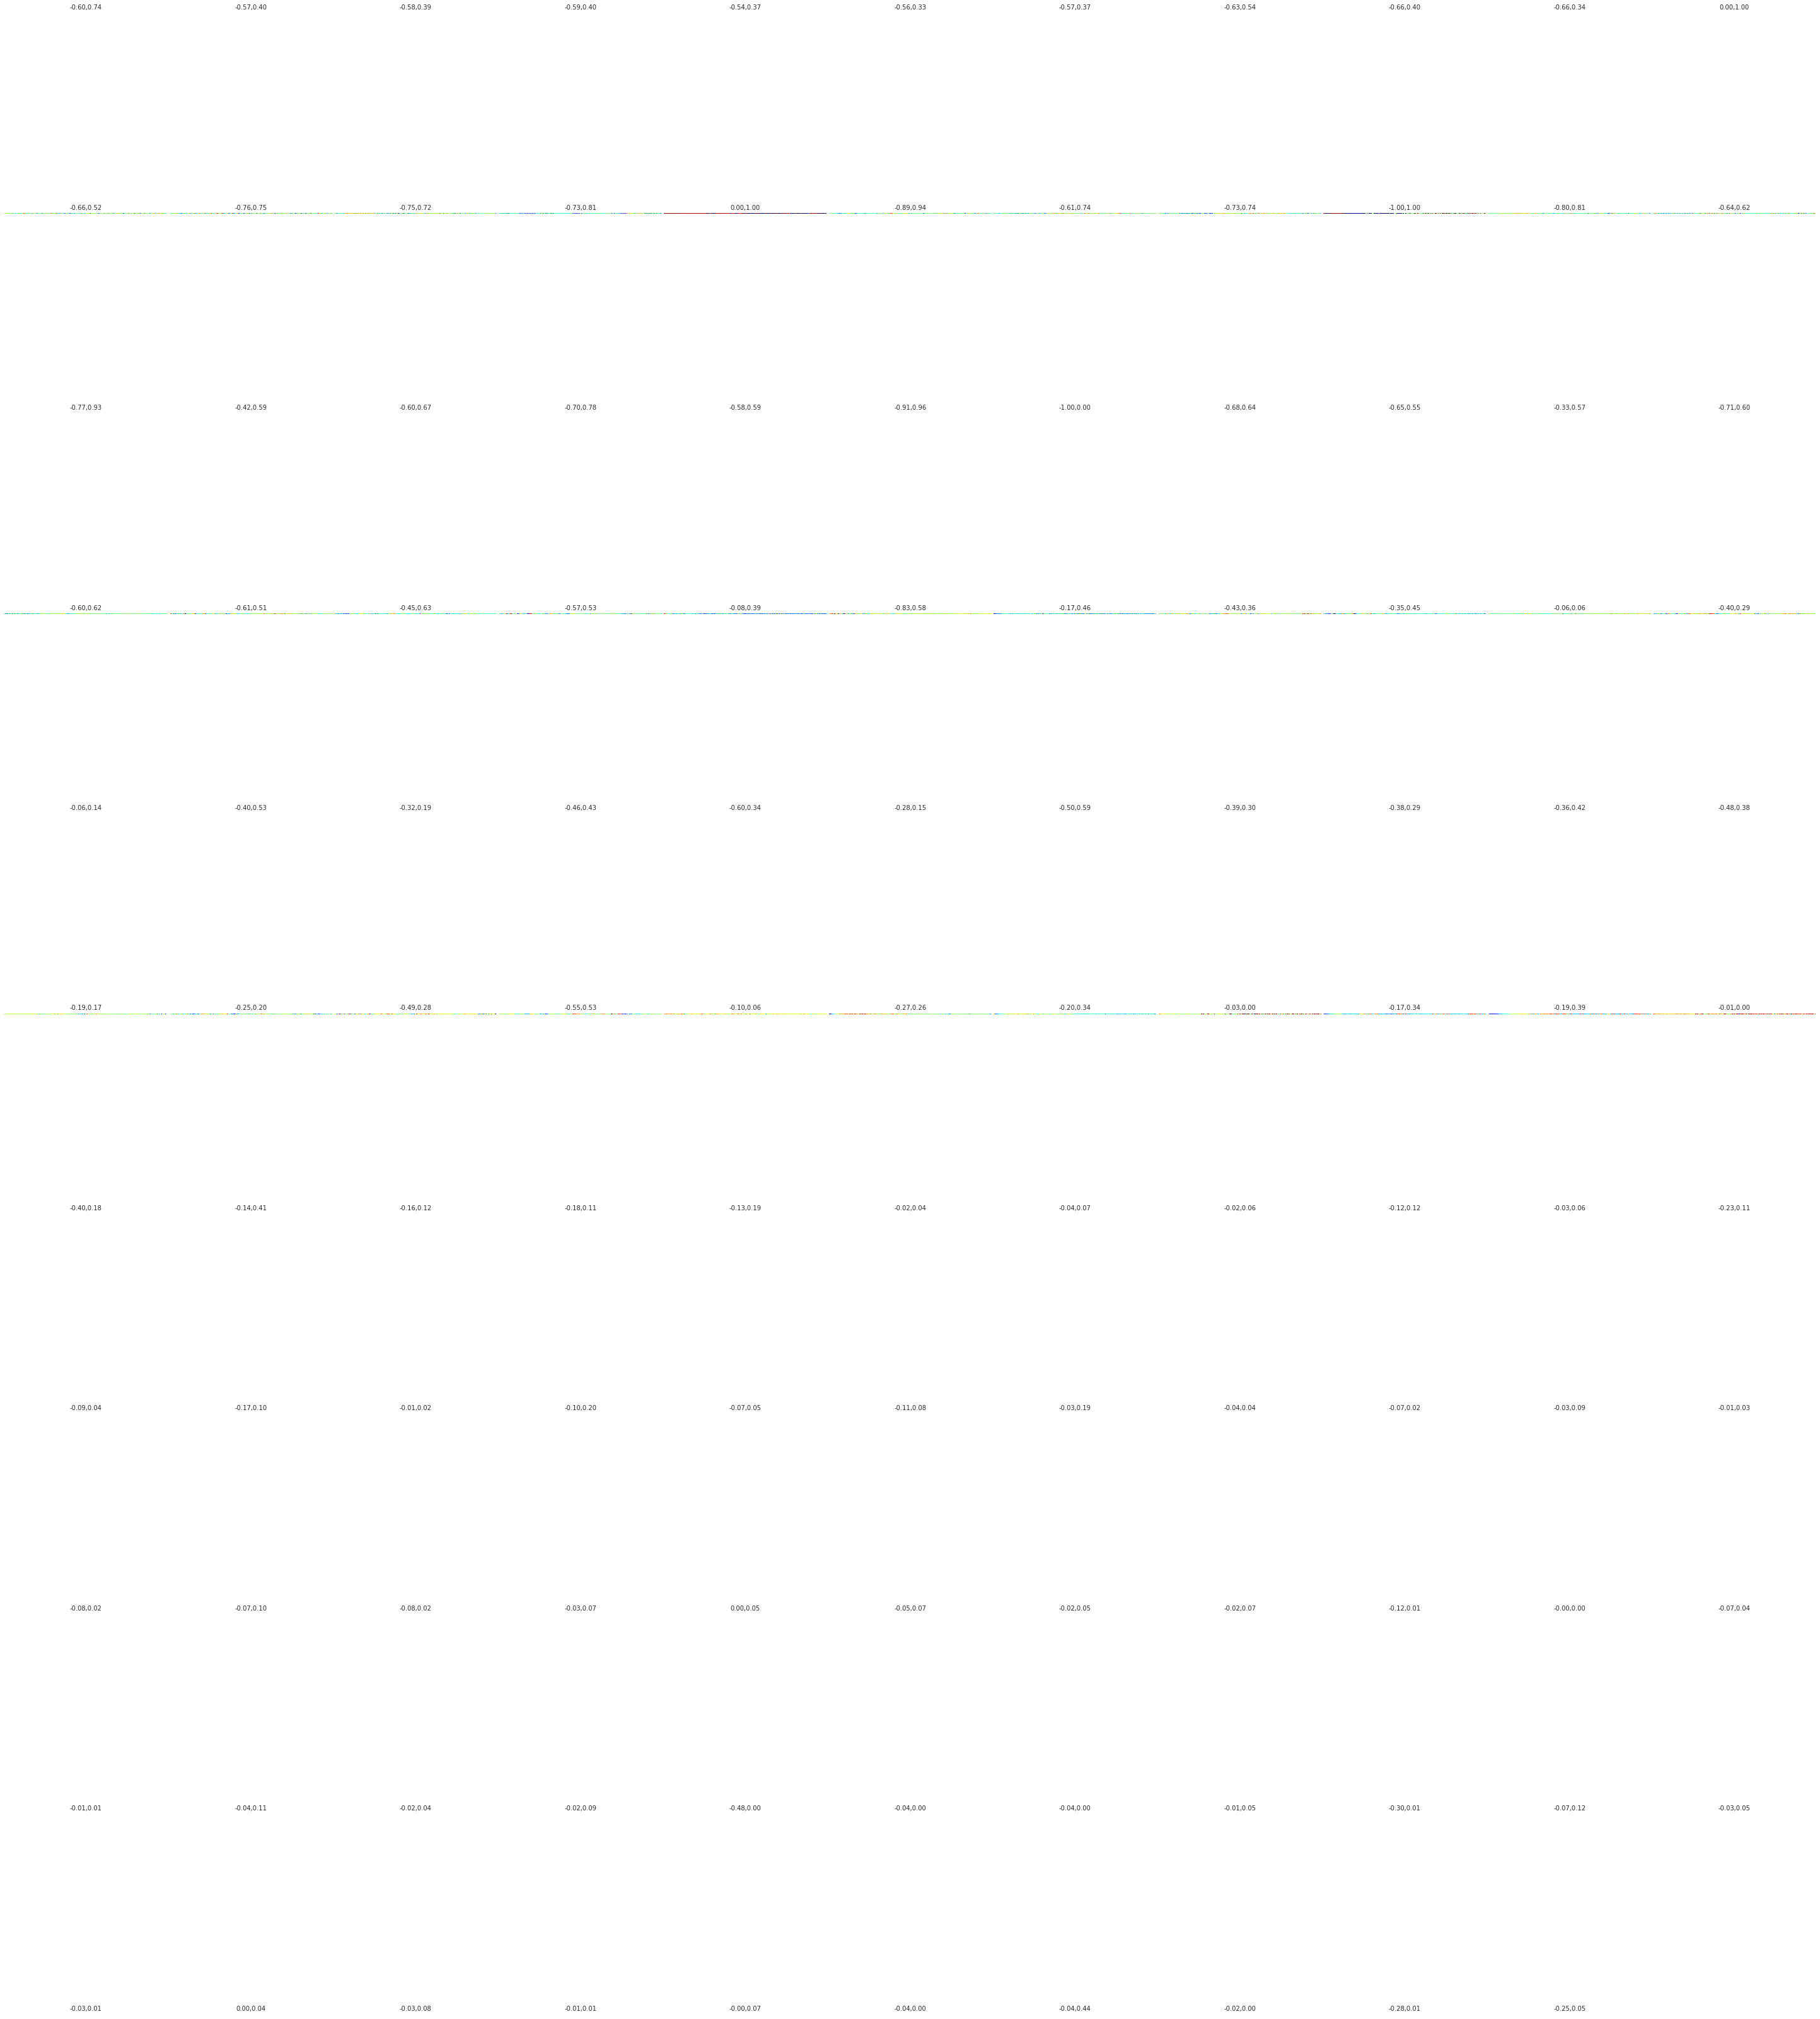

In [ ]:
square_plot(g_all[env0][:,], widths[batch_id[env0]], name='g0_no_smoothing_no_mult', maxmin=maxmin, shiny=shinys_[env0], \
            hexy=params['world_type'], lims=g_lim, mult=1, smoothing=0, cmap=cmap, mask=masks[env0])

In [ ]:
f = plt.figure(figsize=(60, 80))

for i in range(10):
  ax = plt.subplot(12, 10, i + 1)
  G=nx.Graph()
  for j in range(2**(params['widths'][env0])-1):  
    G.add_edges_from([(j,2*j+1),(j,2*j+2)])
  pos = hierarchy_pos(G,0)    
  nx.draw(G, pos=pos, with_labels=False,node_color=g_all[env0][:,i],cmap=plt.cm.jet,vmin=g_lim[0][i], vmax=g_lim[1][i],edge_color="white" )
plt.show()

In [20]:
g_lim[1][1
         ]

0.7025240483338735

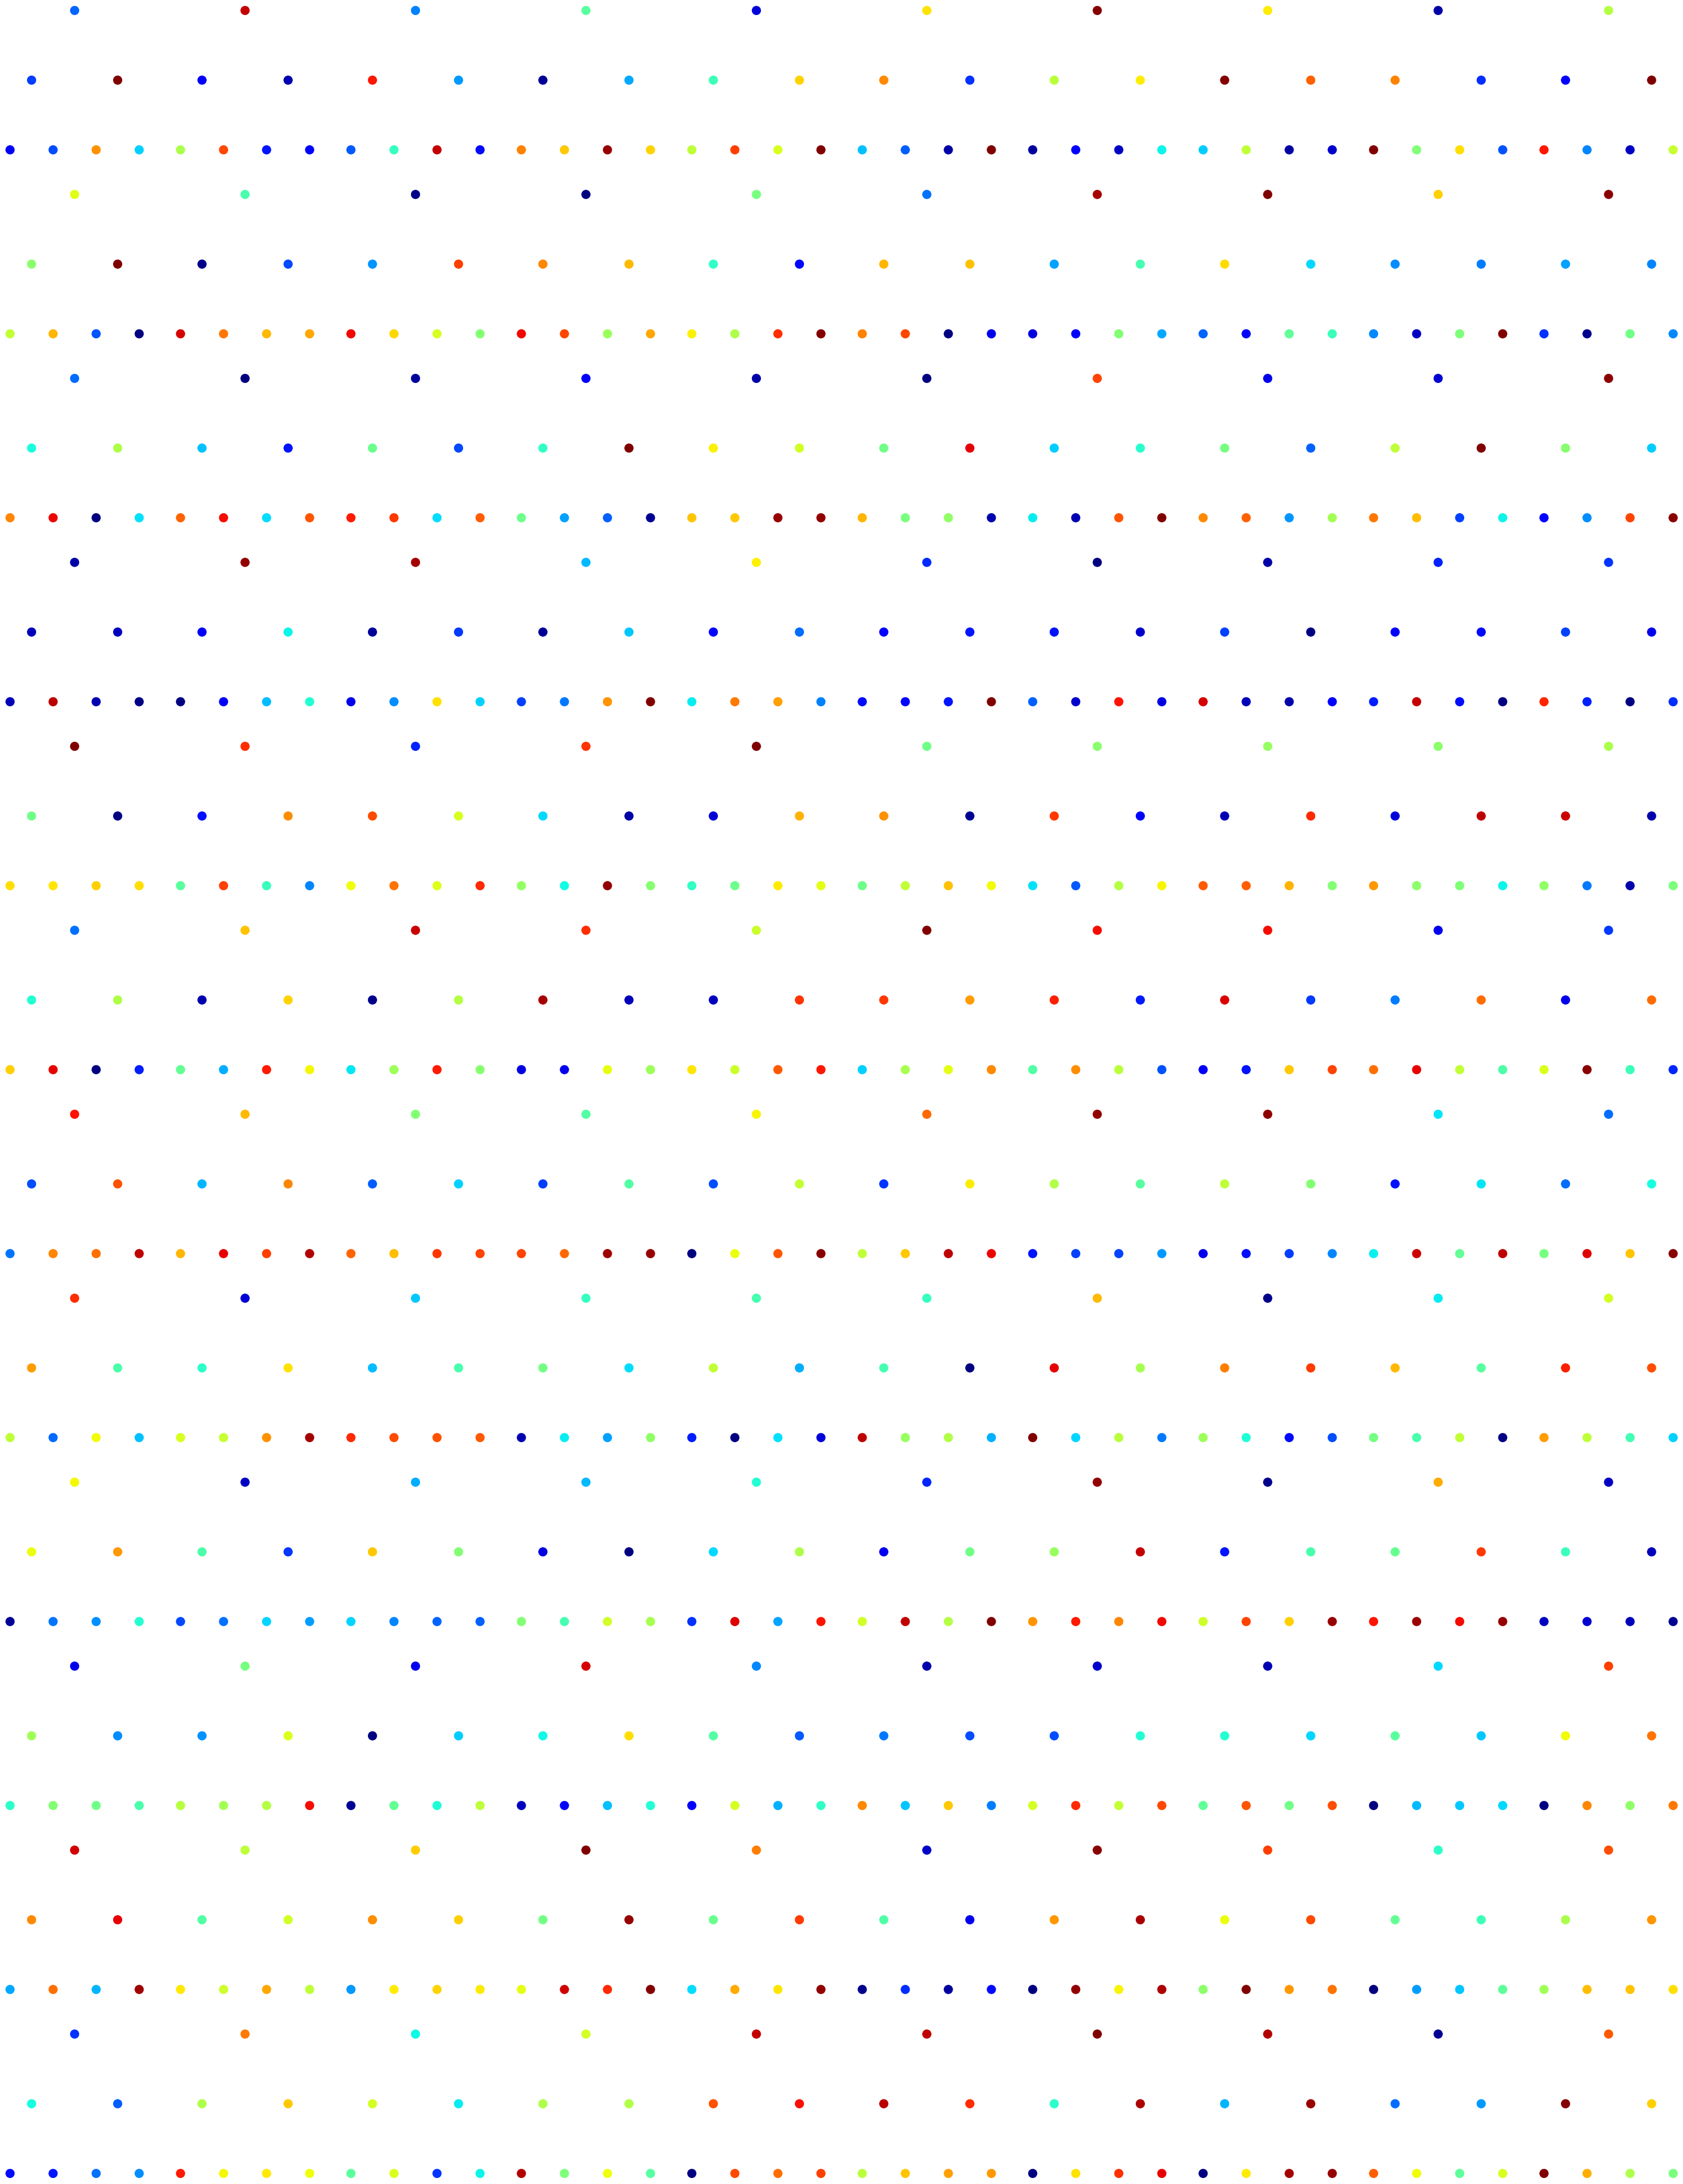

In [15]:
f = plt.figure(figsize=(60, 80))

for i in range(120):
  ax = plt.subplot(12, 10, i + 1)
  G=nx.Graph()
  for j in range(2**(params['widths'][env0])-1):  
    G.add_edges_from([(j,2*j+1),(j,2*j+2)])
  pos = hierarchy_pos(G,0)    
  nx.draw(G, pos=pos, with_labels=False,node_color=g_all[env0][:,i],cmap=plt.cm.jet,vmin=g_lim[0][i], vmax=g_lim[1][i],edge_color="white" )
plt.show()
# f.savefig("g0_pedigree_like.pdf")
# plt.close("all")



In [ ]:
# g1 

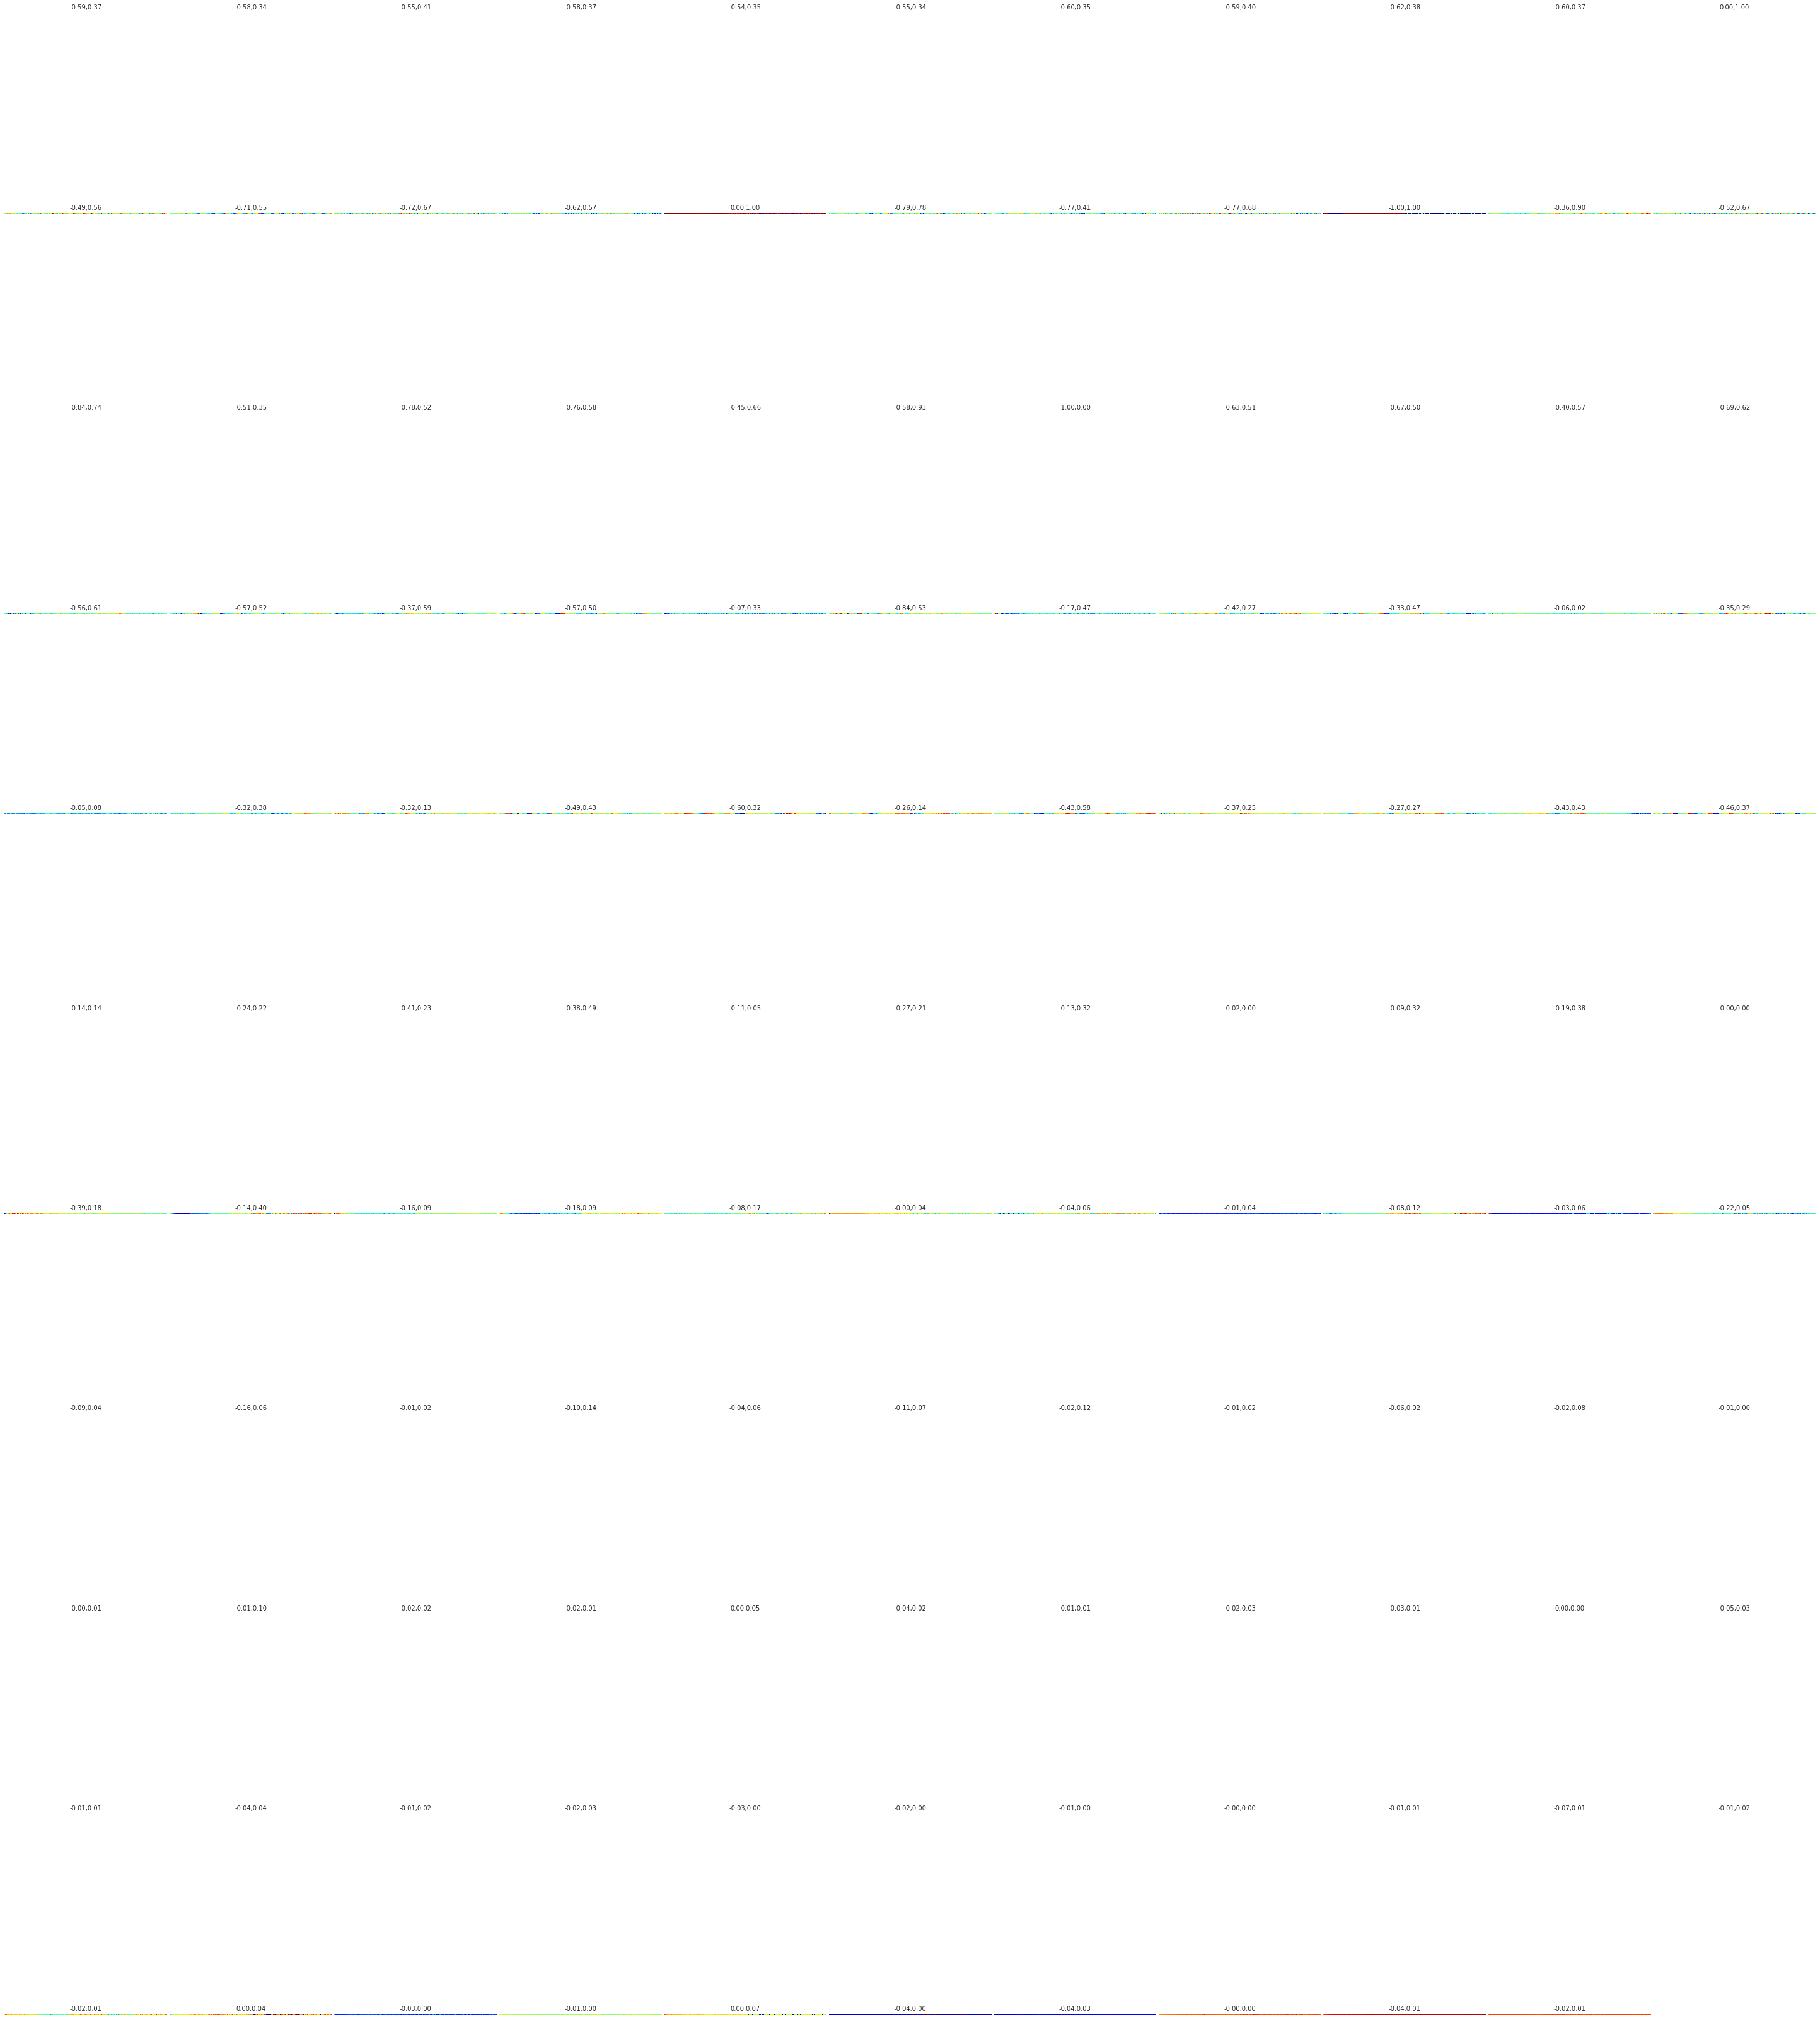

In [ ]:
square_plot(g_all[env1][:,], widths[batch_id[env1]], name='g1_no_smoothing_no_mult', maxmin=maxmin, shiny=shinys_[env1], \
            hexy=params['world_type'], lims=g_lim, mult=1, smoothing=0, cmap=cmap, mask=masks[env1])

In [ ]:
f = plt.figure(figsize=(60, 80))
for i in range(120):
  ax = plt.subplot(12, 10, i + 1)
  G=nx.Graph()
  for j in range(2**(params['widths'][env1])-1):  
    G.add_edges_from([(j,2*j+1),(j,2*j+2)])
  
  pos = hierarchy_pos(G,0)    
  nx.draw(G, pos=pos, with_labels=False,node_color=g_all[env1][:,i],cmap=plt.cm.jet,vmin=g_lim[0][i], vmax=g_lim[1][i],edge_color="white" )
plt.show()
f.savefig("g1_pedigree_like.pdf")
plt.close("all")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# p0

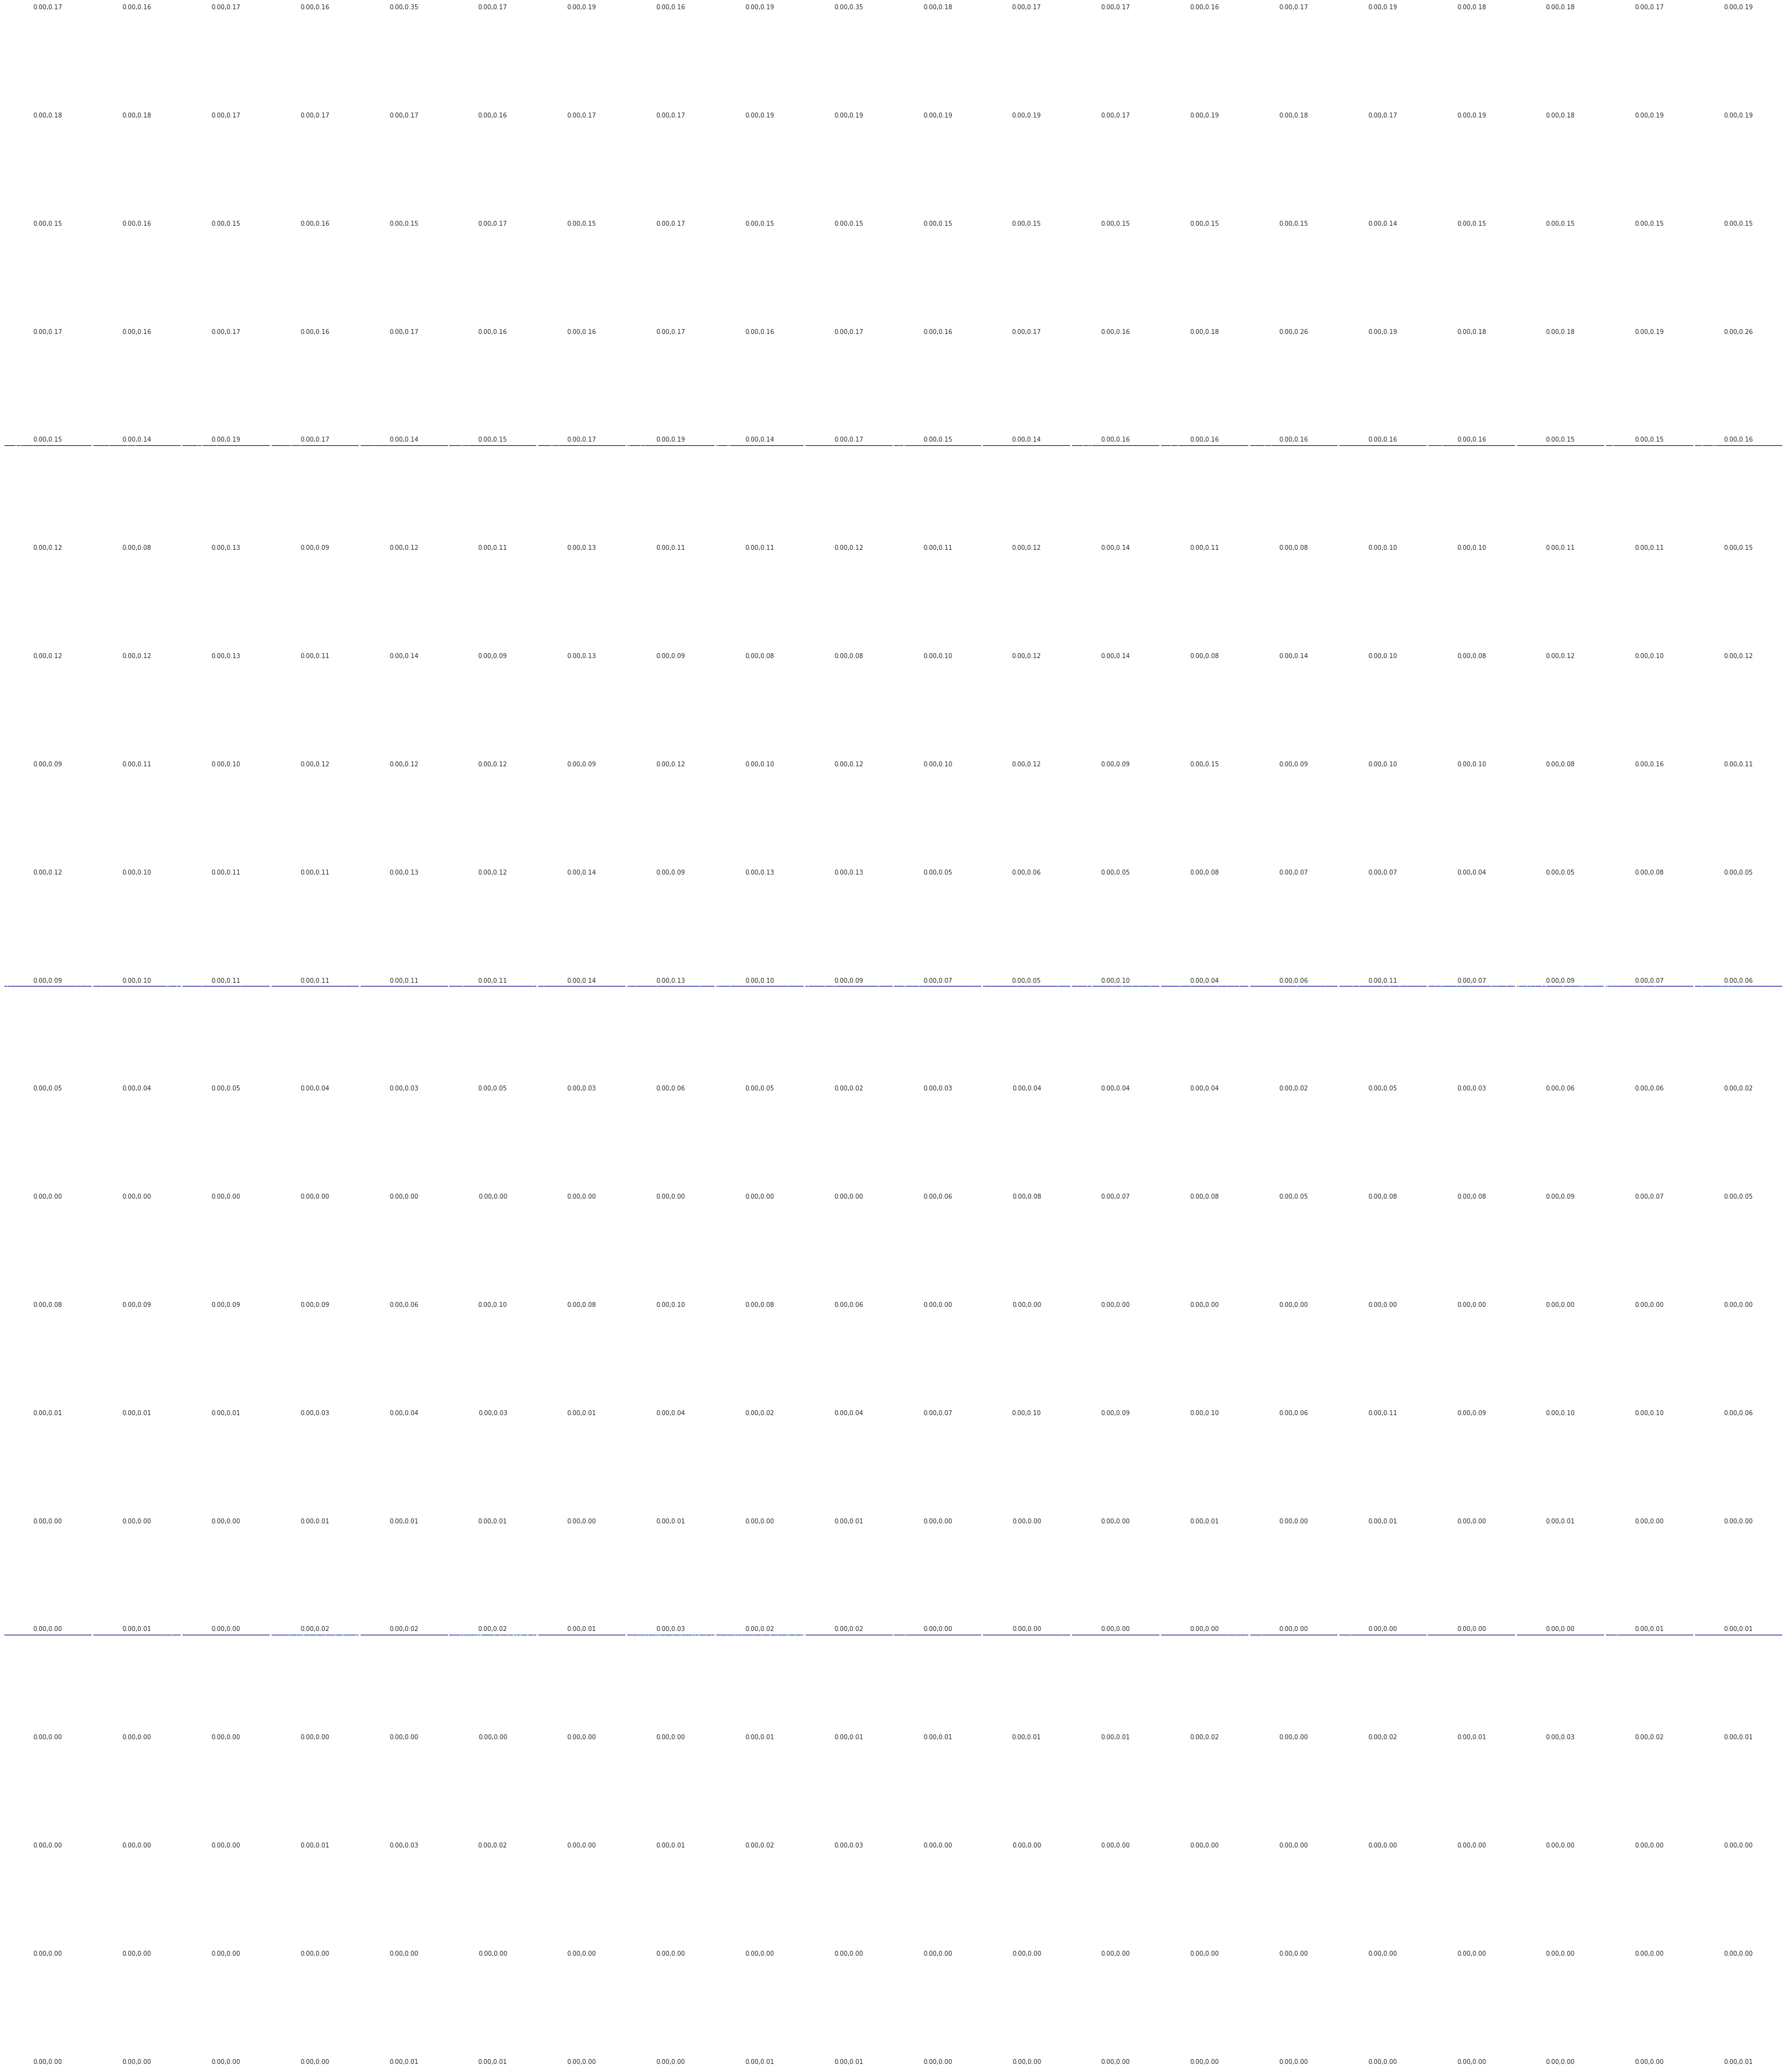

In [ ]:
square_plot(p_all[env0][:,], widths[batch_id[env0]], name='p0_no_smoothing_no_mult', maxmin=maxmin, shiny=shinys_[env0], \
            hexy=params['world_type'], lims=p_lim, mult=1, smoothing=0, cmap=cmap, mask=masks[env0])

In [ ]:


f = plt.figure(figsize=(40, 50))
f = plt.figure(figsize=(60, 99))
for i in range(400):
  ax = plt.subplot(40, 10, i + 1)
  G=nx.Graph()
  for j in range(2**(params['widths'][env0])-1):  
    G.add_edges_from([(j,2*j+1),(j,2*j+2)])
  pos = hierarchy_pos(G,0)    
  nx.draw(G, pos=pos, with_labels=False,node_color=p_all[env0][:,i],cmap=plt.cm.jet,vmin=p_lim[0][i], vmax=p_lim[1][i],edge_color="white" )
plt.show()
f.savefig("p0_pedigree_like.pdf")
plt.close("all")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# p1

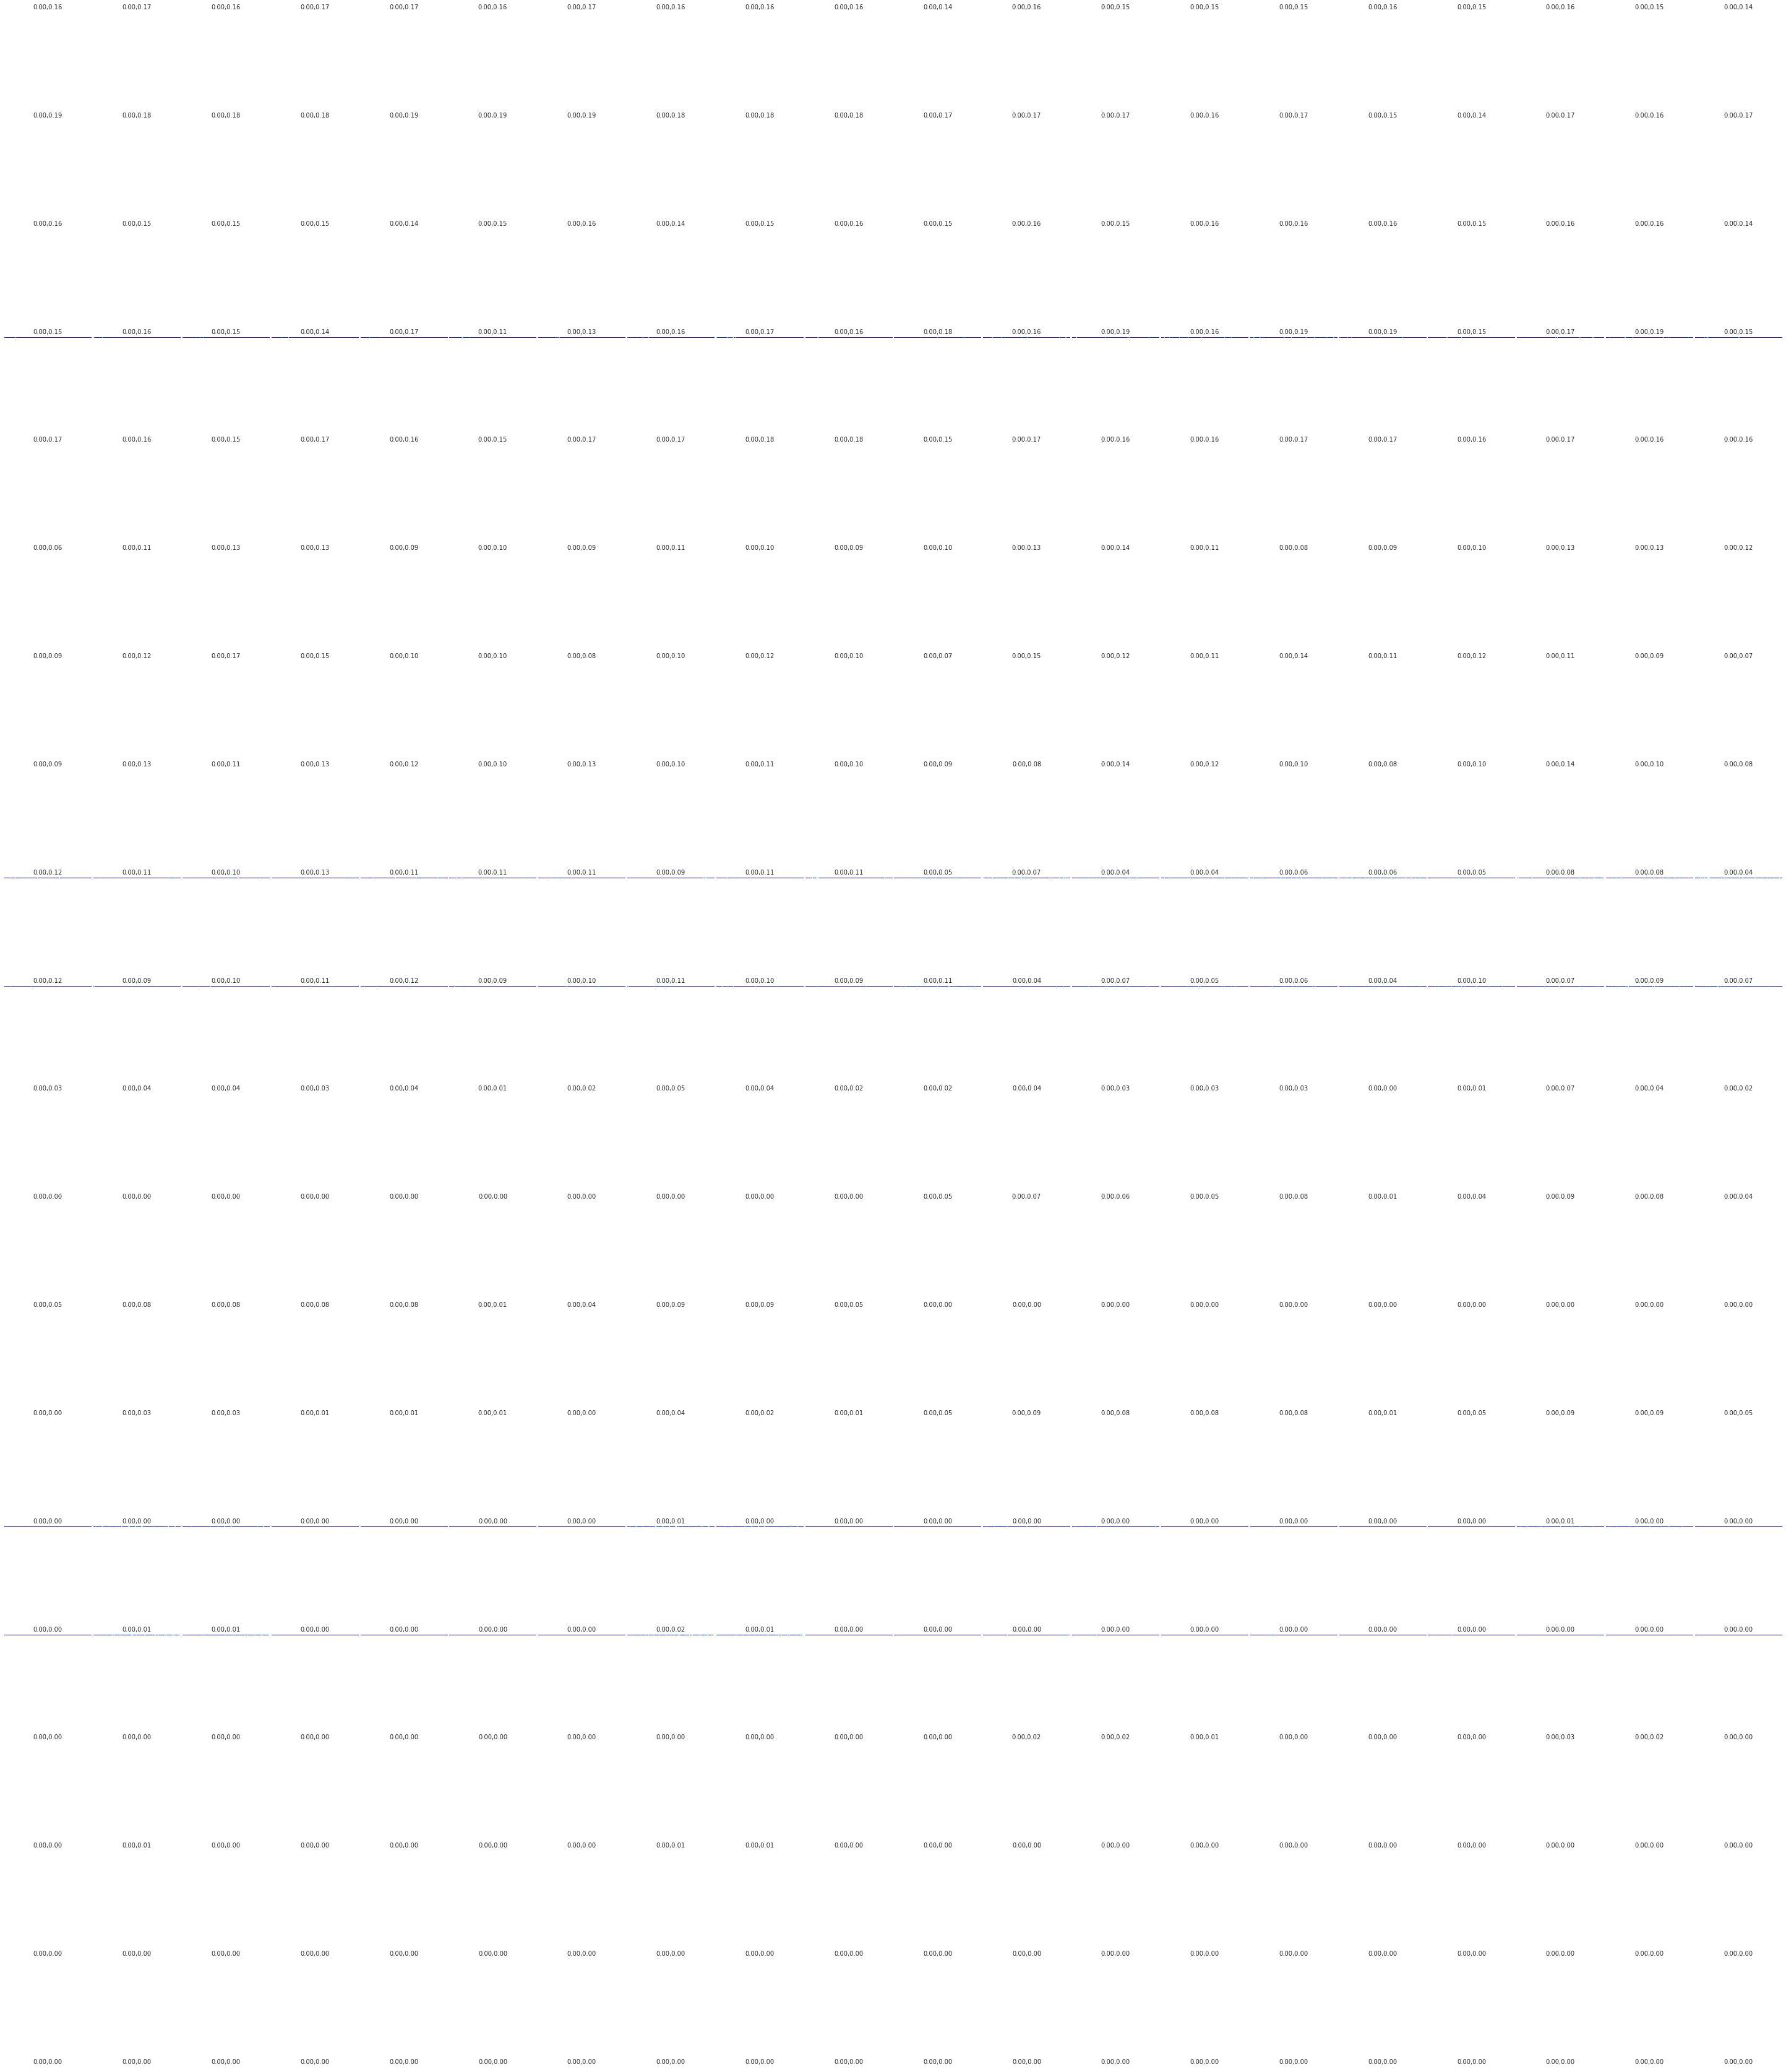

In [ ]:

square_plot(p_all[env1][:,], widths[batch_id[env1]], name='p1_no_smoothing_no_mult', maxmin=maxmin, shiny=shinys_[env1], \
            hexy=params['world_type'], lims=p_lim, mult=1, smoothing=0, cmap=cmap, mask=masks[env1])

In [ ]:


#f = plt.figure(figsize=(40, 50))
f = plt.figure(figsize=(60, 99))
for i in range(400):
  ax = plt.subplot(40, 10, i + 1)
  G=nx.Graph()
  for j in range(2**(params['widths'][env1])-1):  
    G.add_edges_from([(j,2*j+1),(j,2*j+2)])
  pos = hierarchy_pos(G,0)    
  nx.draw(G, pos=pos, with_labels=False,node_color=p_all[env1][:,i],cmap=plt.cm.jet,vmin=p_lim[0][i], vmax=p_lim[1][i],edge_color="white" )
plt.show()
f.savefig("p1_pedigree_like.pdf")
plt.close("all")

Output hidden; open in https://colab.research.google.com to view.

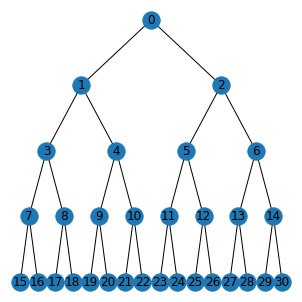

In [ ]:
G=nx.Graph()
#G.add_edges_from([(0,1), (0,2),(1,3), (1,4),(2,5),(2,6)])
plt.figure(3,figsize=(4,4))
for i in range(15):  
  G.add_edges_from([(i,2*i+1),(i,2*i+2)])
  #G.add_edges_from([(i,2*i+2)])
  

pos = hierarchy_pos(G,0)  
nx.draw(G, pos=pos, with_labels=True)#,edge_color="white")